# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [4]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import seaborn as sns 
from numpy.random import rand
from numpy.random import seed

In [5]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 

np.random.seed(3155)


In [6]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from func_list import polynomial_features, OLS_parameters#, mse_poly_plot

In [7]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 

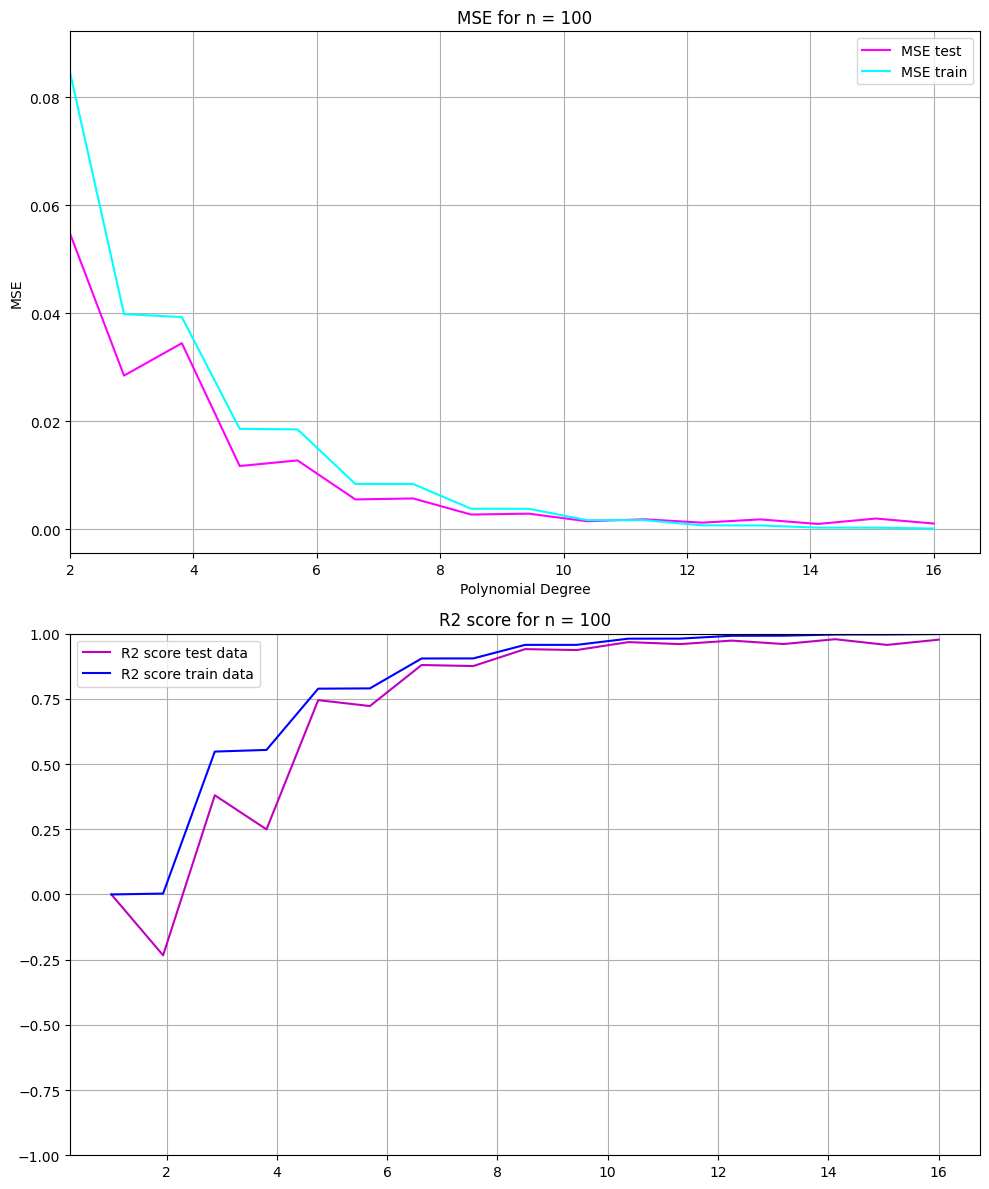

[ 0.00000000e+00 -5.97085012e-02 -1.70277224e+01  2.06955145e+00
  1.66910539e+02 -2.32423123e+01 -9.06718126e+02  1.19556088e+02
  2.84550039e+03 -3.20066536e+02 -5.27687530e+03  4.60241805e+02
  5.69506606e+03 -3.36156360e+02 -3.30118840e+03  9.76537155e+01
  7.93401684e+02]


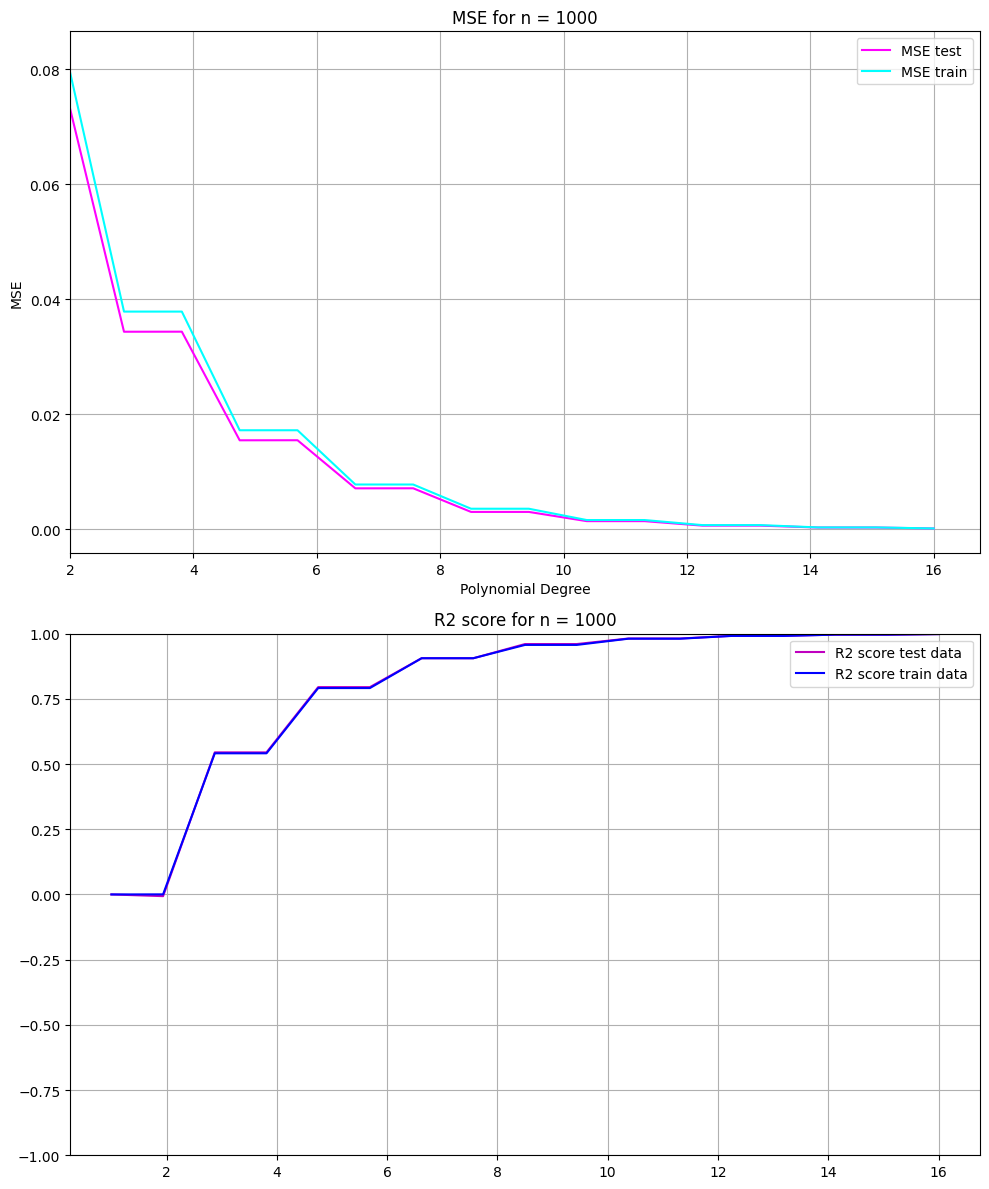

[ 0.00000000e+00 -8.41443166e-03 -1.68929297e+01  1.66006081e-01
  1.64103224e+02 -1.37915655e+00 -8.79930363e+02  5.99537029e+00
  2.71652725e+03 -1.49437310e+01 -4.94474441e+03  2.13444944e+01
  5.23153396e+03 -1.60646440e+01 -2.97126112e+03  4.89659440e+00
  6.99763034e+02]


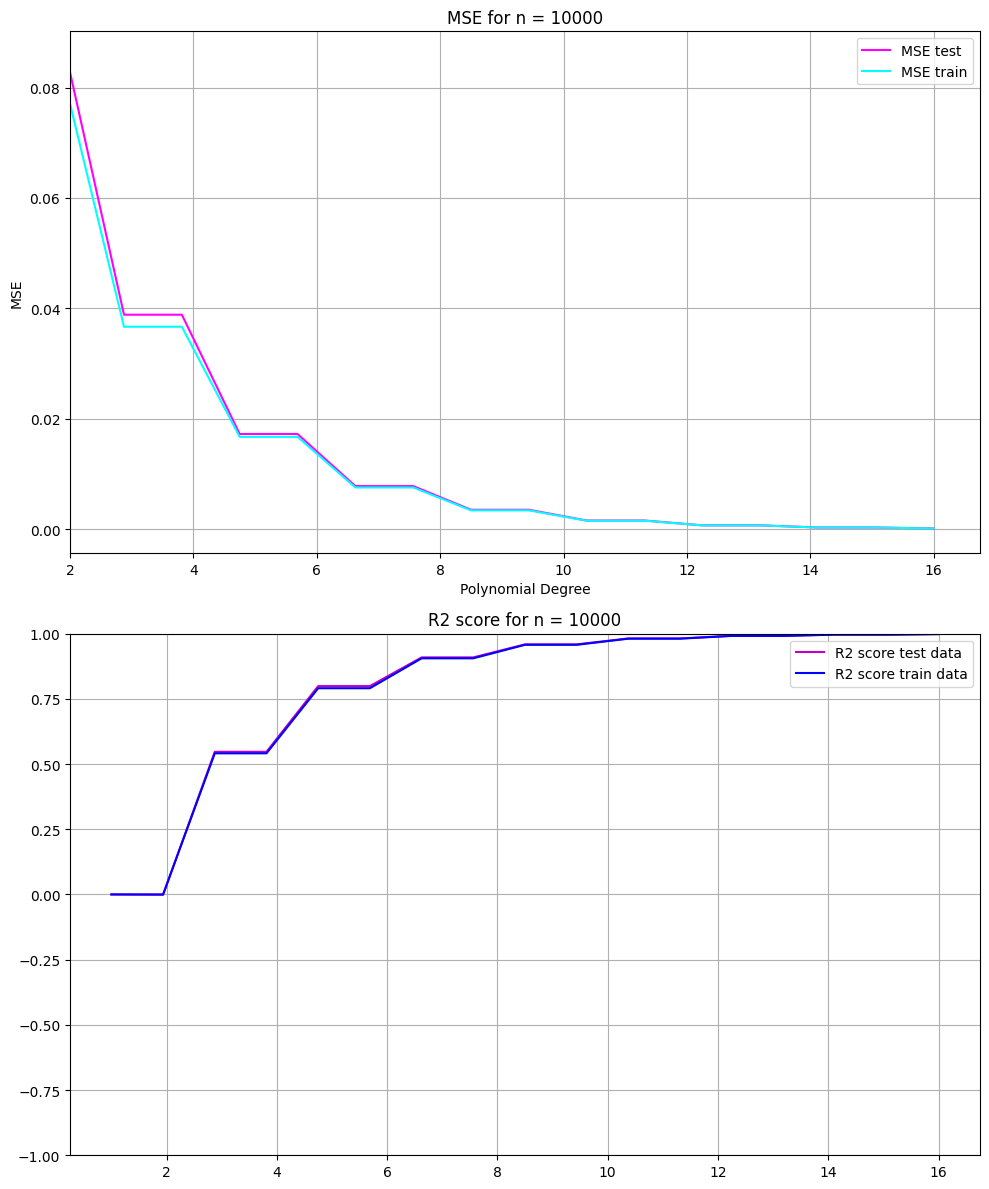

[ 0.00000000e+00 -1.73208743e-03 -1.68006363e+01  4.40298488e-02
  1.62812827e+02 -3.97612313e-01 -8.71791282e+02  1.73467100e+00
  2.68961821e+03 -4.03024788e+00 -4.89478789e+03  5.04453428e+00
  5.17910610e+03 -3.18682562e+00 -2.94222662e+03  7.92233000e-01
  6.93169433e+02]


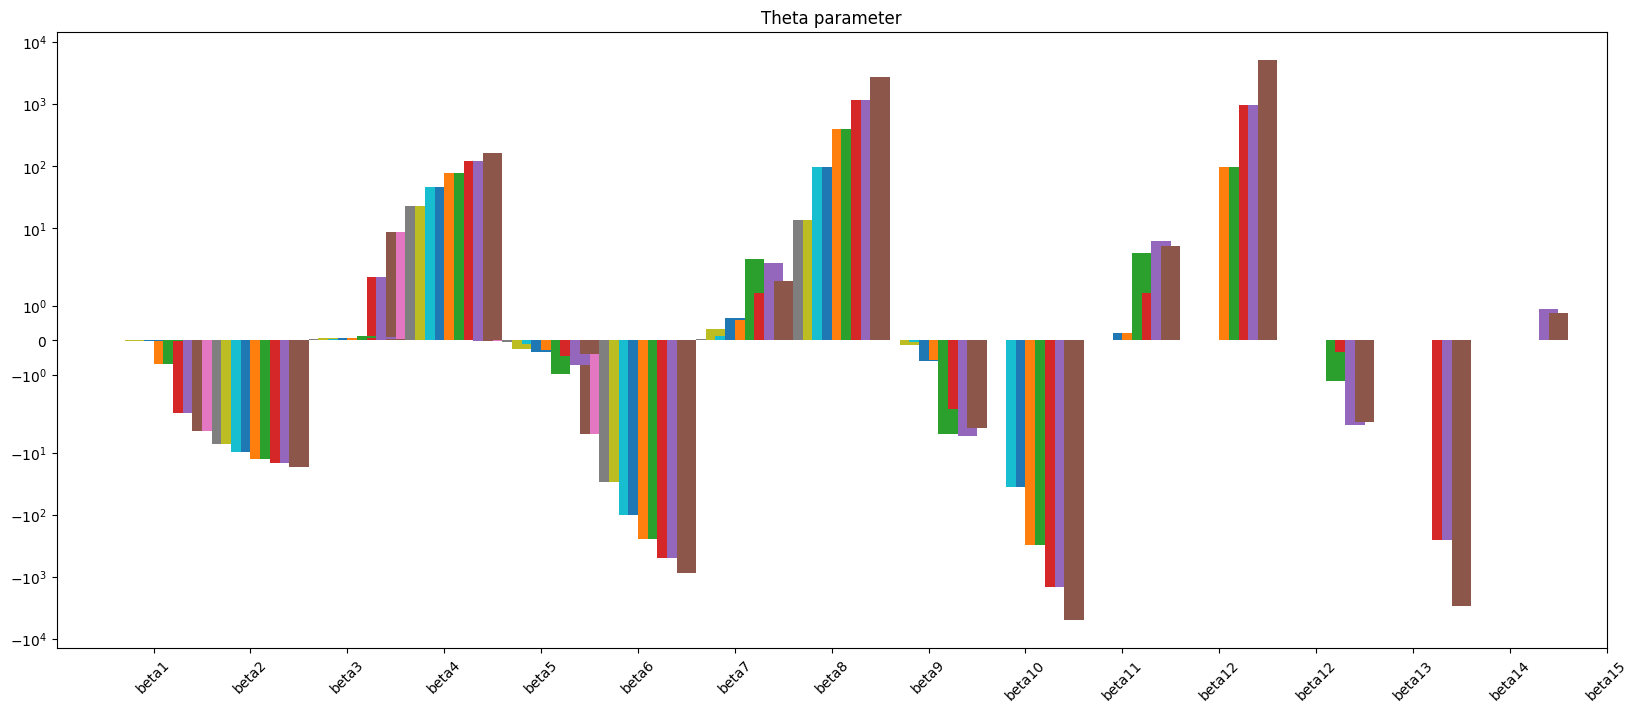

In [8]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

#MSE and changing the polynomial degree
def mse_poly_plot_OLS(degree, intercept=bool):
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        poly_deg = np.linspace(1,degree,degree+1)
        mse_train_list = np.zeros(degree+1)
        mse_test_list = np.zeros(degree+1)
        R2_test = np.zeros(degree+1)
        R2_train = np.zeros(degree+1)
        beta_matrix = np.zeros((degree+1, degree+1))

        #range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x,p,intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
            scaler = StandardScaler(with_std = False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean) 

            beta = OLS_parameters(X_train_s,y_scaled_train)
        
            y_pred_train = (X_train_s @ beta + y_mean)
            y_pred_test = (X_test_s @ beta + y_mean)

            mse_train_list[p] = MSE(y_train,y_pred_train)
            mse_test_list[p] = MSE(y_test, y_pred_test)

            R2_test[p] = r2_score(y_test, y_pred_test)
            #print(f'The R2 score is: {R2_test} for degree: {p}')
            R2_train[p] = r2_score(y_train, y_pred_train)

            for i in range(len(beta)):
                beta_matrix[p-1,i] = beta[i]    
                #print(beta_matrix)
    

        fig,ax = plt.subplots(2, figsize=(10,12))
        ax[0].plot(poly_deg, mse_test_list, label = "MSE test", color = "magenta")
        ax[0].plot(poly_deg, mse_train_list, label = "MSE train", color = "cyan")
        ax[0].set_title(f'MSE for n = {n}')
        ax[0].set_ylabel("MSE")
        ax[0].set_xlabel("Polynomial Degree")
        ax[1].plot(poly_deg, R2_test, label = 'R2 score test data', color = 'm')
        ax[1].plot(poly_deg, R2_train, label = 'R2 score train data', color = 'b')
        ax[1].set_ylim(-1,1)
        ax[1].set_title(f'R2 score for n = {n}')
        ax[0].set_xlim(2)
        ax[0].grid(True)
        ax[0].legend()
        ax[1].legend()
        ax[1].grid(True)
        plt.tight_layout()
        plt.show()
        print(beta)

    
    num_rows, num_columns = beta_matrix.shape
    names = ['beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11', 'beta12', 'beta12', 'beta13', 'beta14', 'beta15']
    bar_width = 0.1
    r = np.arange(num_columns)
    plt.figure(figsize=(20,8))
    for m in range(num_rows): 
        plt.bar(r + m * bar_width, beta_matrix[m, :degree+1], label = f'Row: {m+1}', width=0.2)
        plt.xticks(range(2,degree+2),names, rotation = 45)
        plt.yscale('symlog')
        plt.title('Theta parameter')
        plt.xlim(1)



    return beta

beta_ols = mse_poly_plot_OLS(degree=16, intercept=False)

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# Exercise 1B

In [9]:
from func_list import Ridge_parameters

#MSE and changing lambda
def poly_plot_ridge(intercept=False, annotate = False):
    np.random.seed(3155)
    nlambdas = 16
    lambdas = np.logspace(-5,1,nlambdas)
    degree = 16
    poly_deg = np.arange(1,degree,degree+1) #c 
    for n in [100,1000,10000]:
        #create dataset
        x = np.linspace(-1,1, n) #x within interval [-1,1]
        denominator = 1+(25*x**2)
        y = 1/denominator# + np.random.normal(0, 1, x.shape) 

        #create empty lists
        mse_train_list = np.zeros((degree, nlambdas,))
        mse_test_list = np.zeros((degree, nlambdas))
        R2_test = np.zeros((degree, nlambdas))
        R2_train = np.zeros((degree, nlambdas))
        #beta_matrix = np.zeros(((nlambdas+1, nlambdas)))

        #range polynomial degree
        for p in range(1, degree+1):
            for j, lmb in enumerate(lambdas):
                X = polynomial_features(x,p,intercept=intercept)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
                scaler = StandardScaler(with_std = True) #scale with standard deviation this time
                scaler.fit(X_train)
                X_train_s = scaler.transform(X_train)
                X_test_s = scaler.transform(X_test)
                y_mean = np.mean(y_train)
                #y_std = np.std(y_train)
                y_scaled_train = (y_train - y_mean) #centered, not scaled

                beta = Ridge_parameters(X_train_s, y_scaled_train, lmb)
    
                y_pred_train = (X_train_s @ beta + y_mean)
                y_pred_test = (X_test_s @ beta + y_mean)

                mse_train_list[p-1,j] = MSE(y_train,y_pred_train)
                mse_test_list[p-1,j] = MSE(y_test, y_pred_test)

                R2_test[p-1,j] = r2_score(y_test, y_pred_test)
                R2_train[p-1,j] = r2_score(y_train, y_pred_train)
        
        fig,axes = plt.subplots(2,2, figsize=(16,16)) #c 
        titles = ['MSE train', 'MSE test', '$R^2$ train', '$R^2$ test']
        data = [mse_train_list, mse_test_list, R2_train, R2_test]
        for ax, title,plotting in zip(axes.ravel(), titles, data):
            sns.heatmap(plotting, ax=ax, xticklabels=[f'{lmb:.1e}' for lmb in lambdas], yticklabels=np.arange(1,degree+1), cmap='PiYG', annot = annotate, cbar = True)
            ax.set_title(f'{title} for n: {n}')
            ax.set_ylabel('Polynomial Degree')
            ax.set_xlabel(f'$\lambda$')
            ax.invert_yaxis()
            ax.invert_xaxis()
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    plt.show()
    #return mse_test_list, mse_train_list
    return beta

    #return mse_test_list, mse_train_list

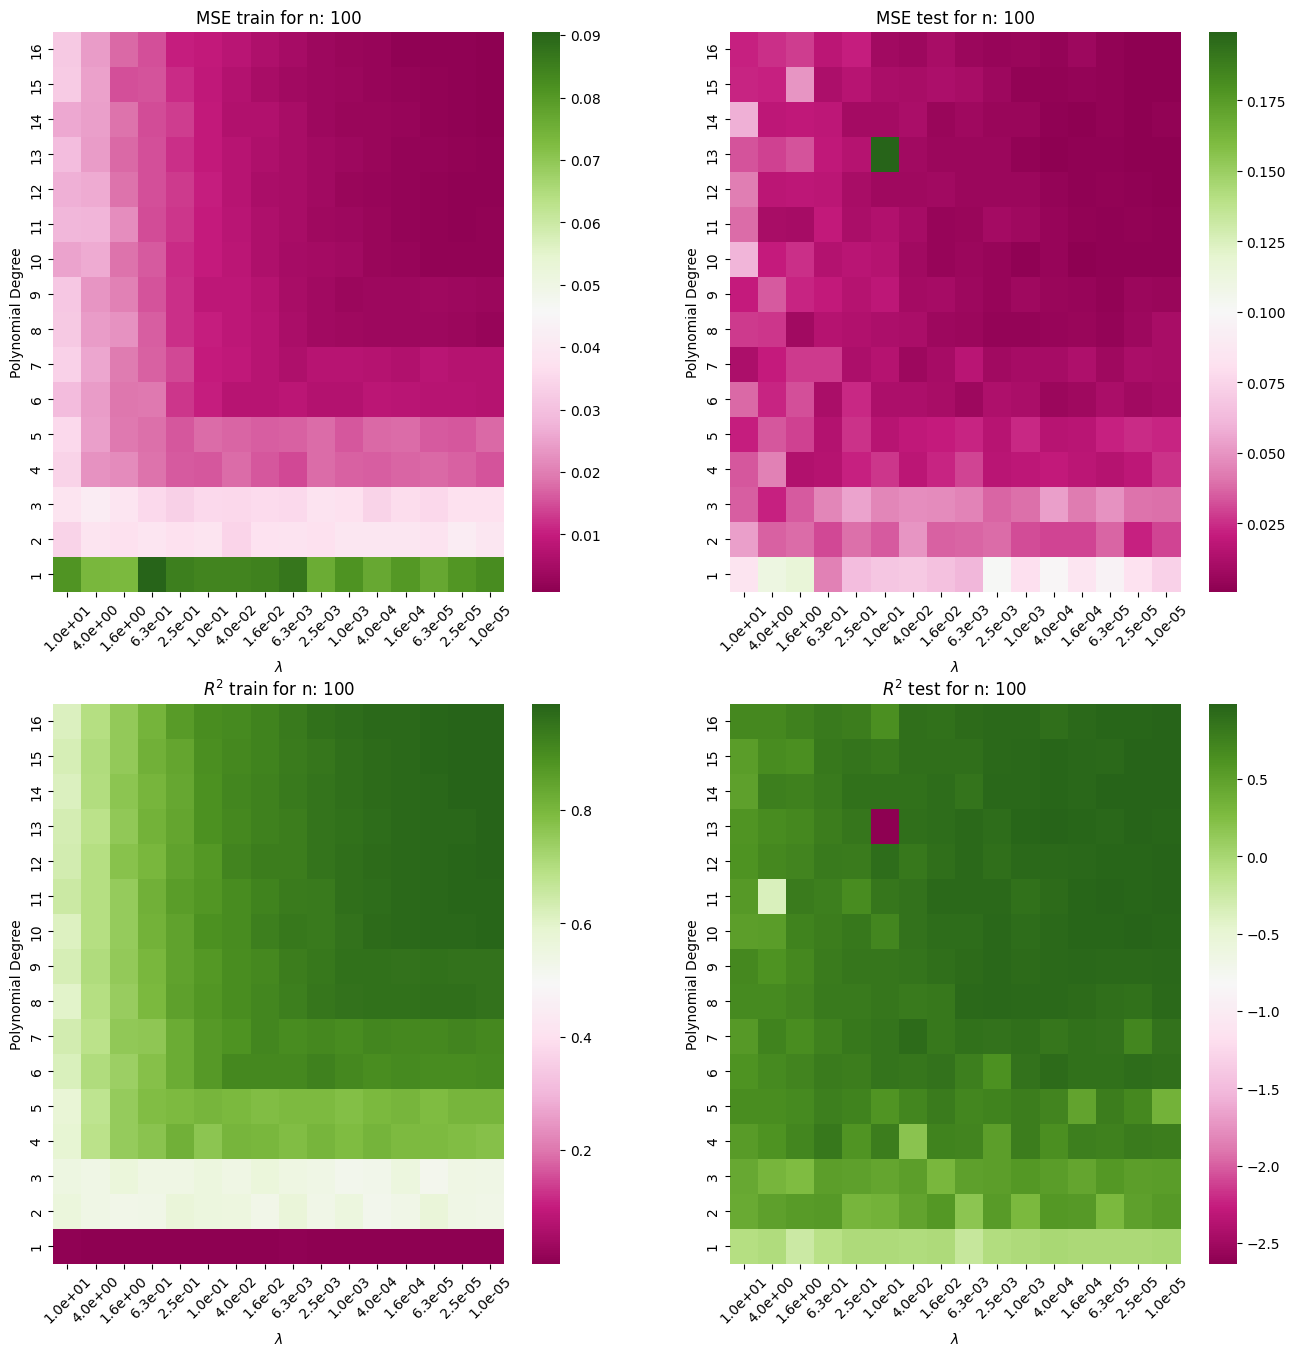

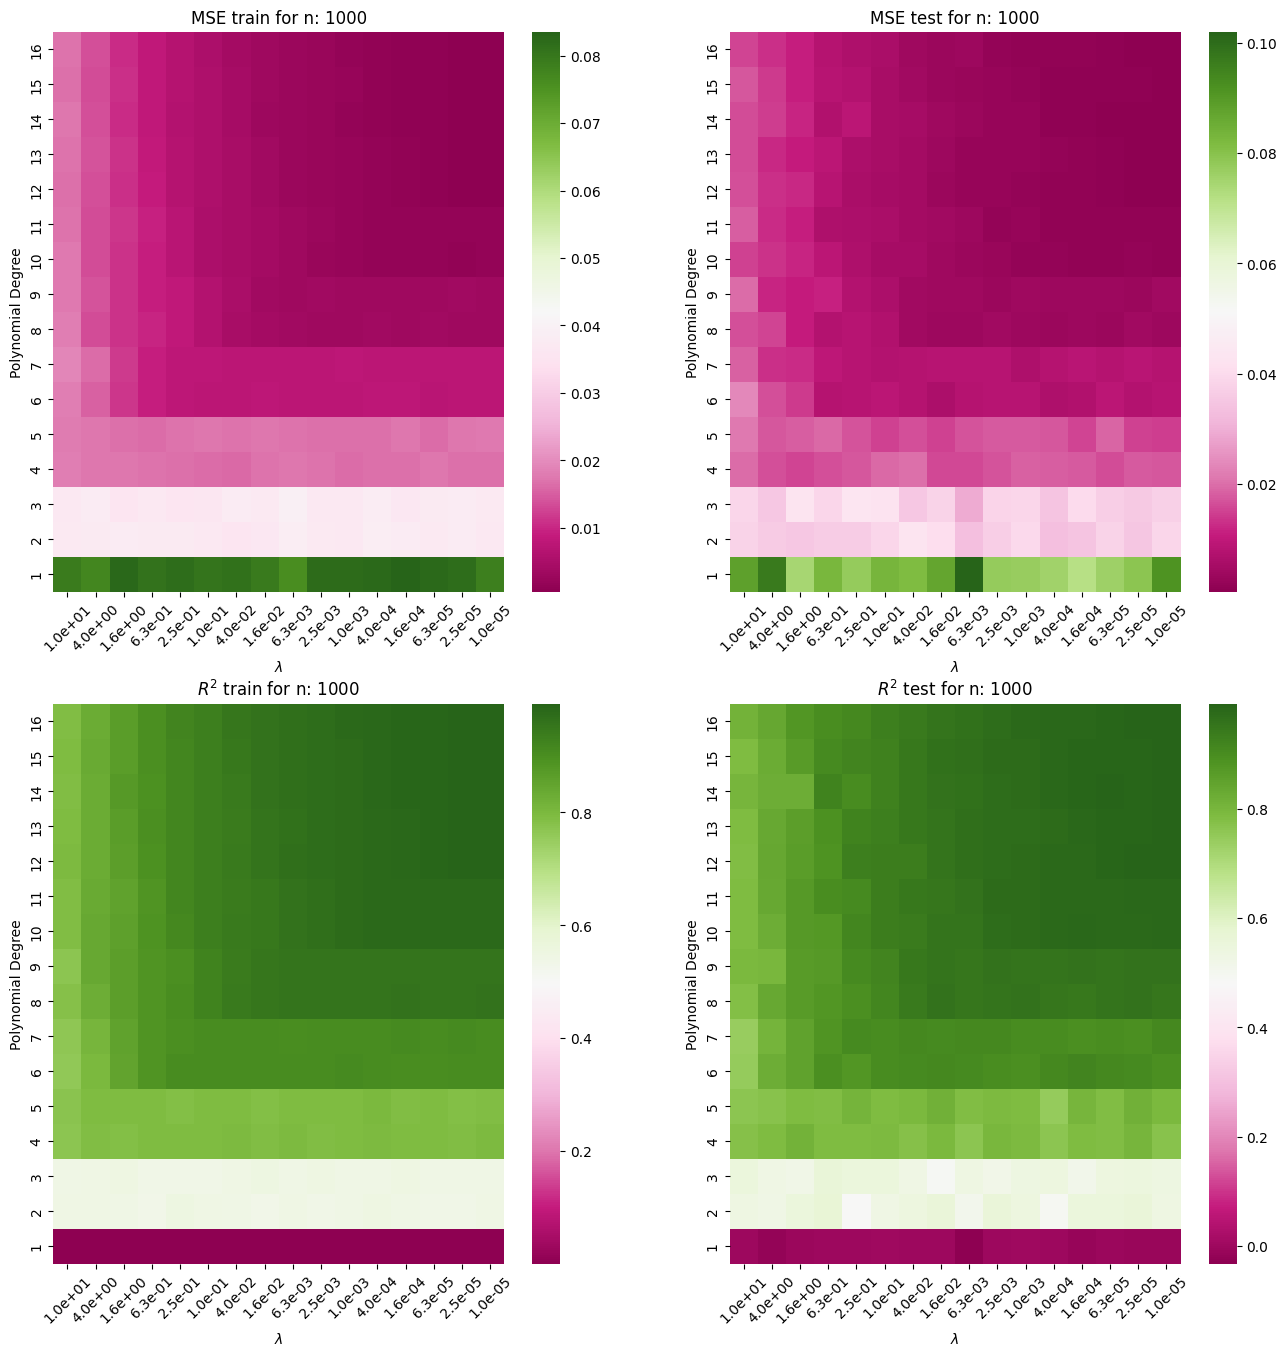

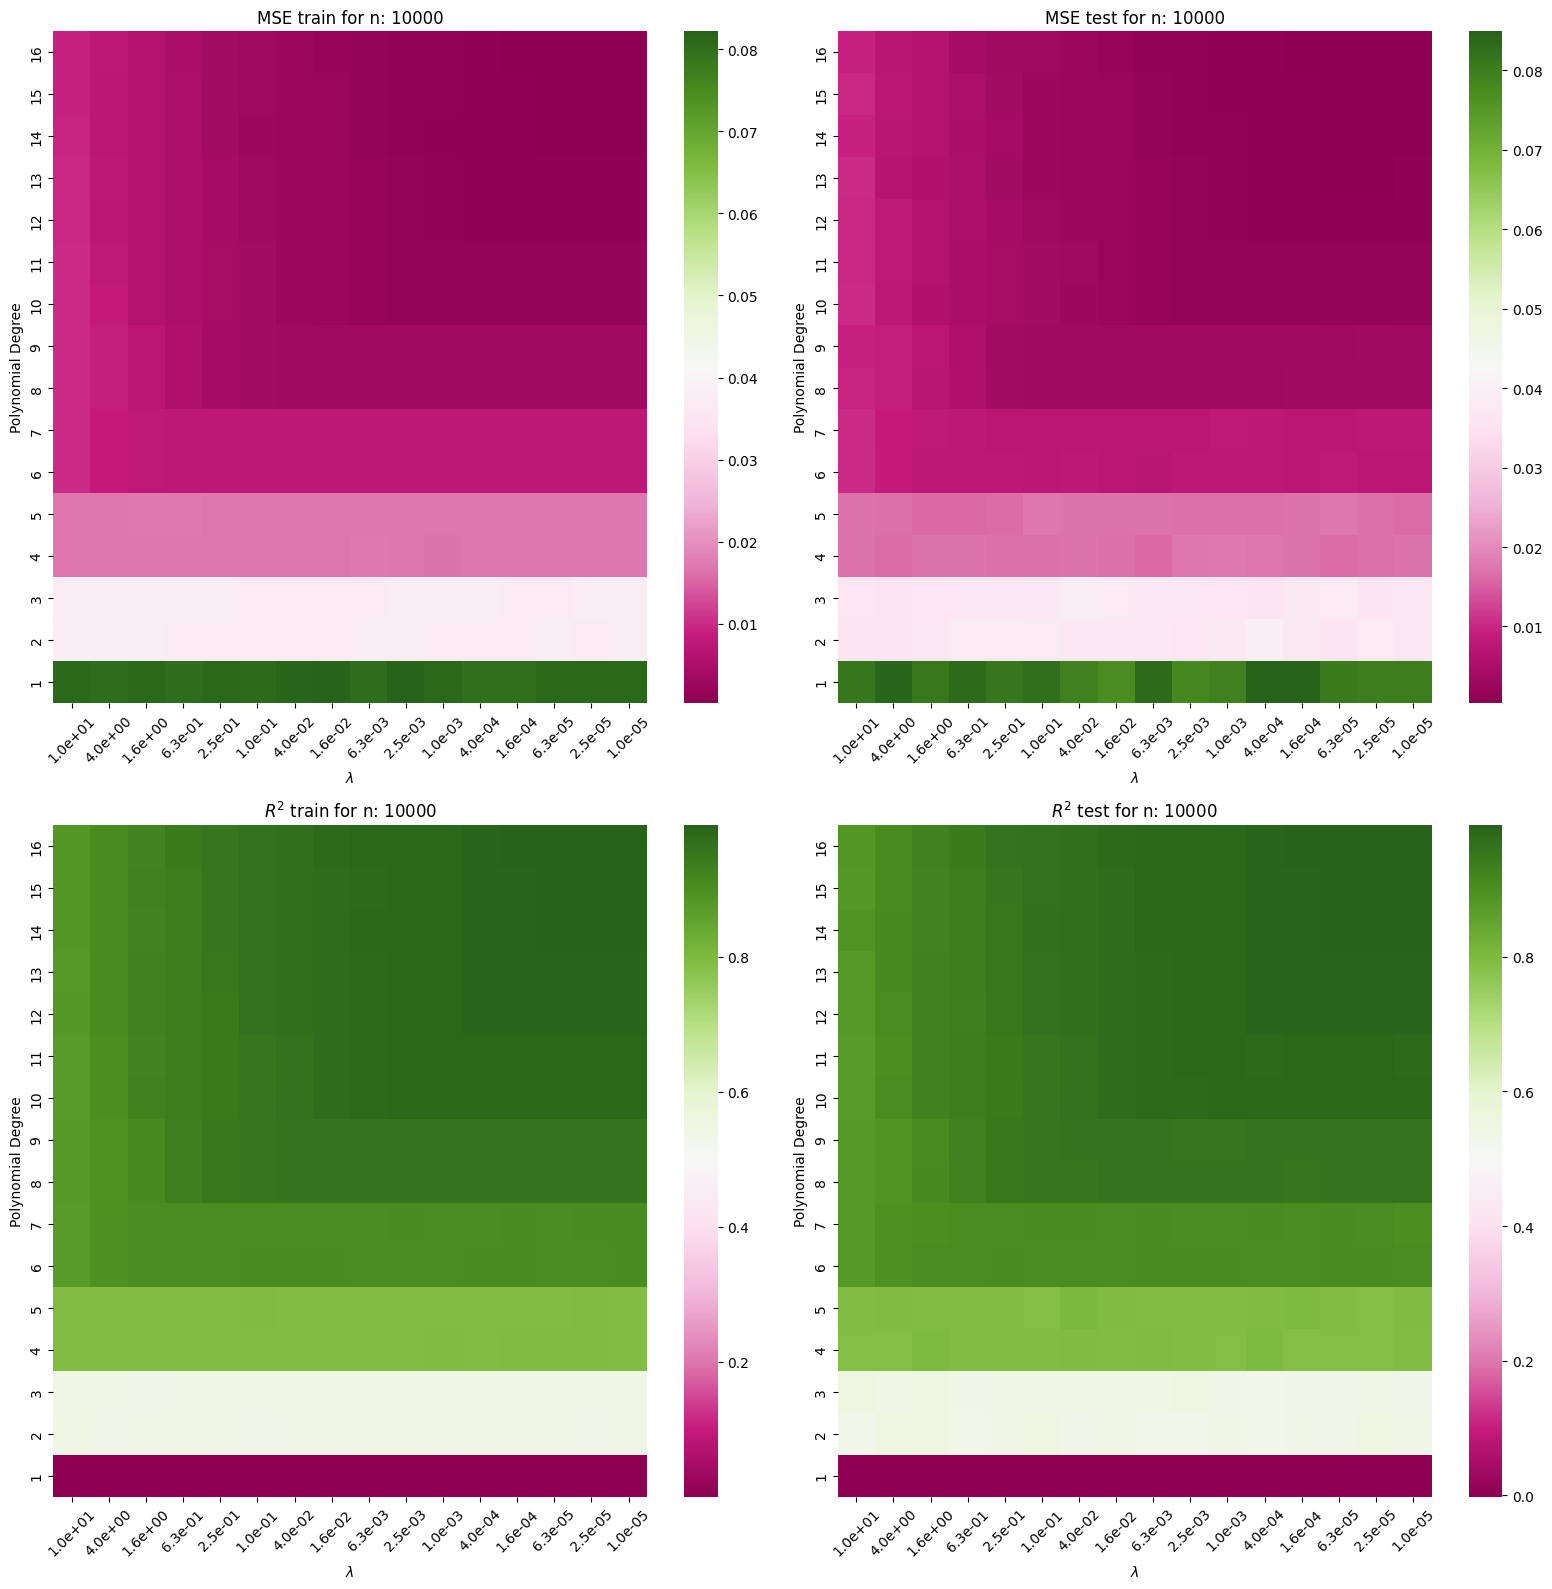

In [10]:
beta_ridge = poly_plot_ridge()

# exercise 1C

In [11]:
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.1
    lam = 0.1 #fixed lambda for the Ridge
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            theta_gdOLSn -= grad_OLSn * eta

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta
            theta_gdRidgen -= grad_Ridgen * eta 
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)
        

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss")
    ax[0,1].set_title("Ridge loss")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression')
    ax[1,0].set_title('R2 scores for the OLS Regression')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression')
    ax[2,1].set_title('MSE for the Ridge Regression')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen


loop broken at 823 for degree: 1
(17,)
[0.46650526 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 703 for degree: 2
(17,)
[0.46650526 0.57051523 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 756 for degree: 3
(17,)
[0.46650526 0.57051523 0.33897965 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 731 for degree: 4
(17,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 705 for degree: 5
(17,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.49755056 0.
 0.         0.         0.         0.         0

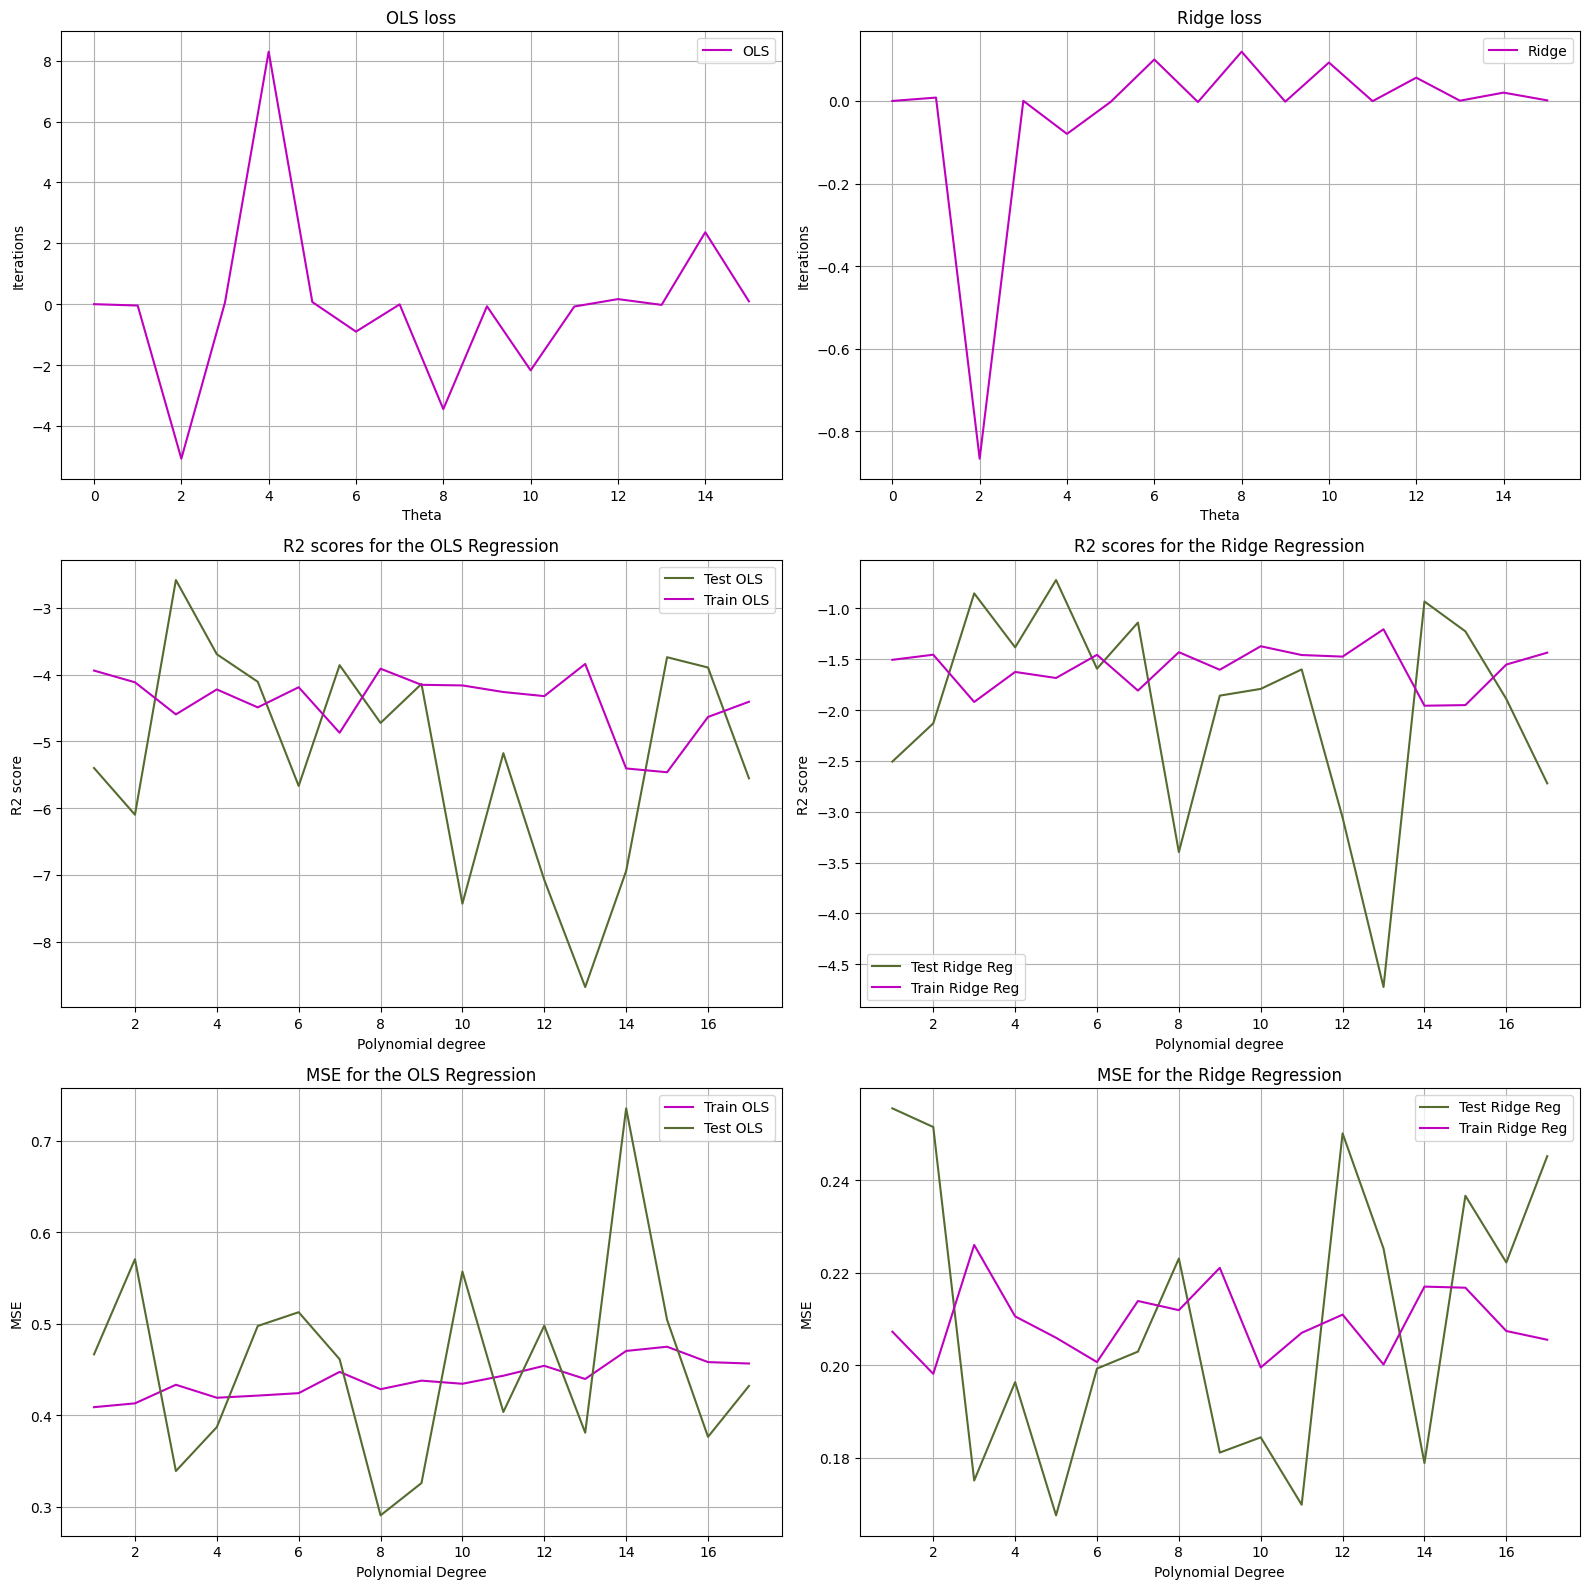

In [12]:
theta_grad_ols, theta_grad_ridge = gradient(x,y, n_feat=16)

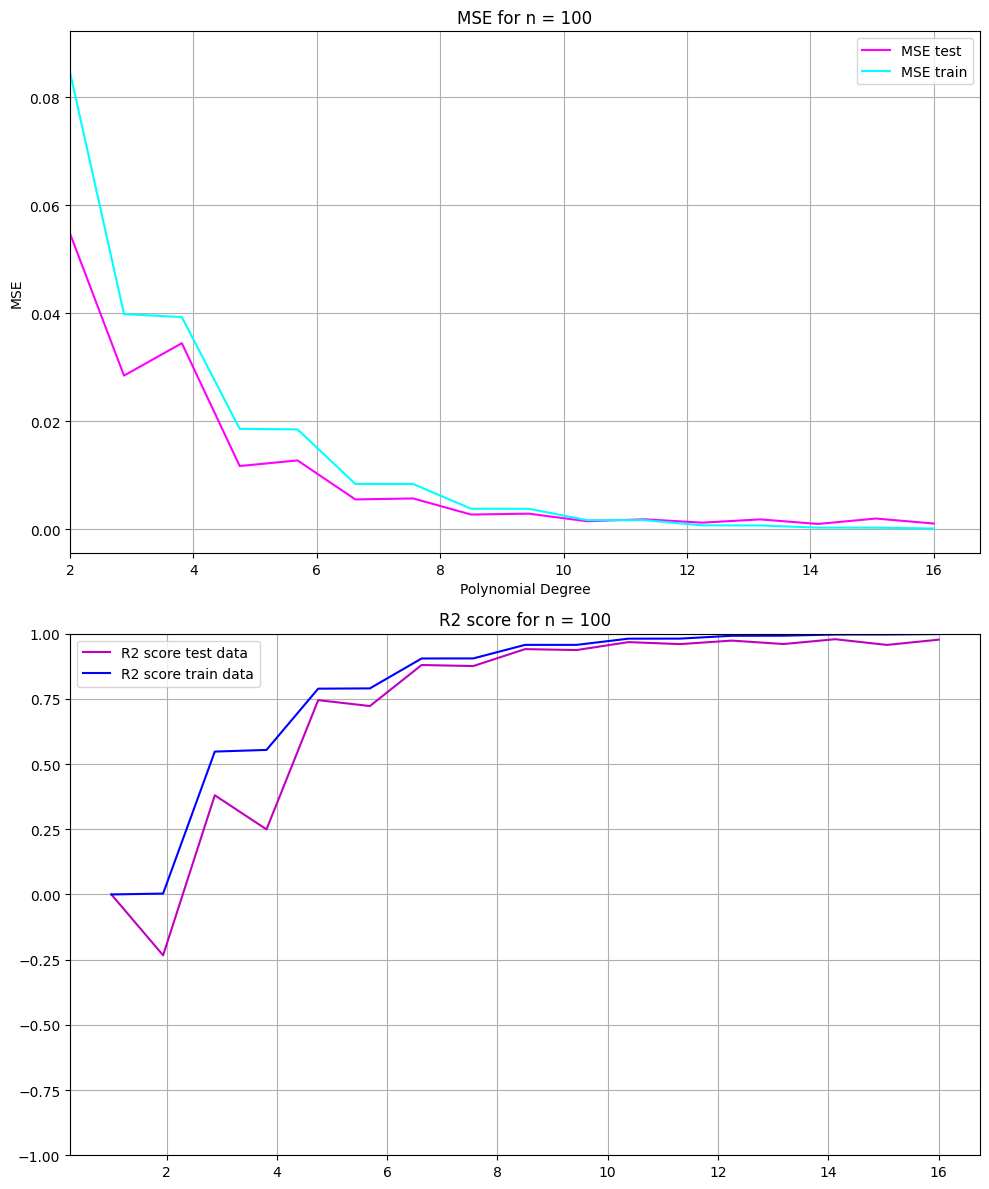

[ 0.00000000e+00 -5.97085012e-02 -1.70277224e+01  2.06955145e+00
  1.66910539e+02 -2.32423123e+01 -9.06718126e+02  1.19556088e+02
  2.84550039e+03 -3.20066536e+02 -5.27687530e+03  4.60241805e+02
  5.69506606e+03 -3.36156360e+02 -3.30118840e+03  9.76537155e+01
  7.93401684e+02]


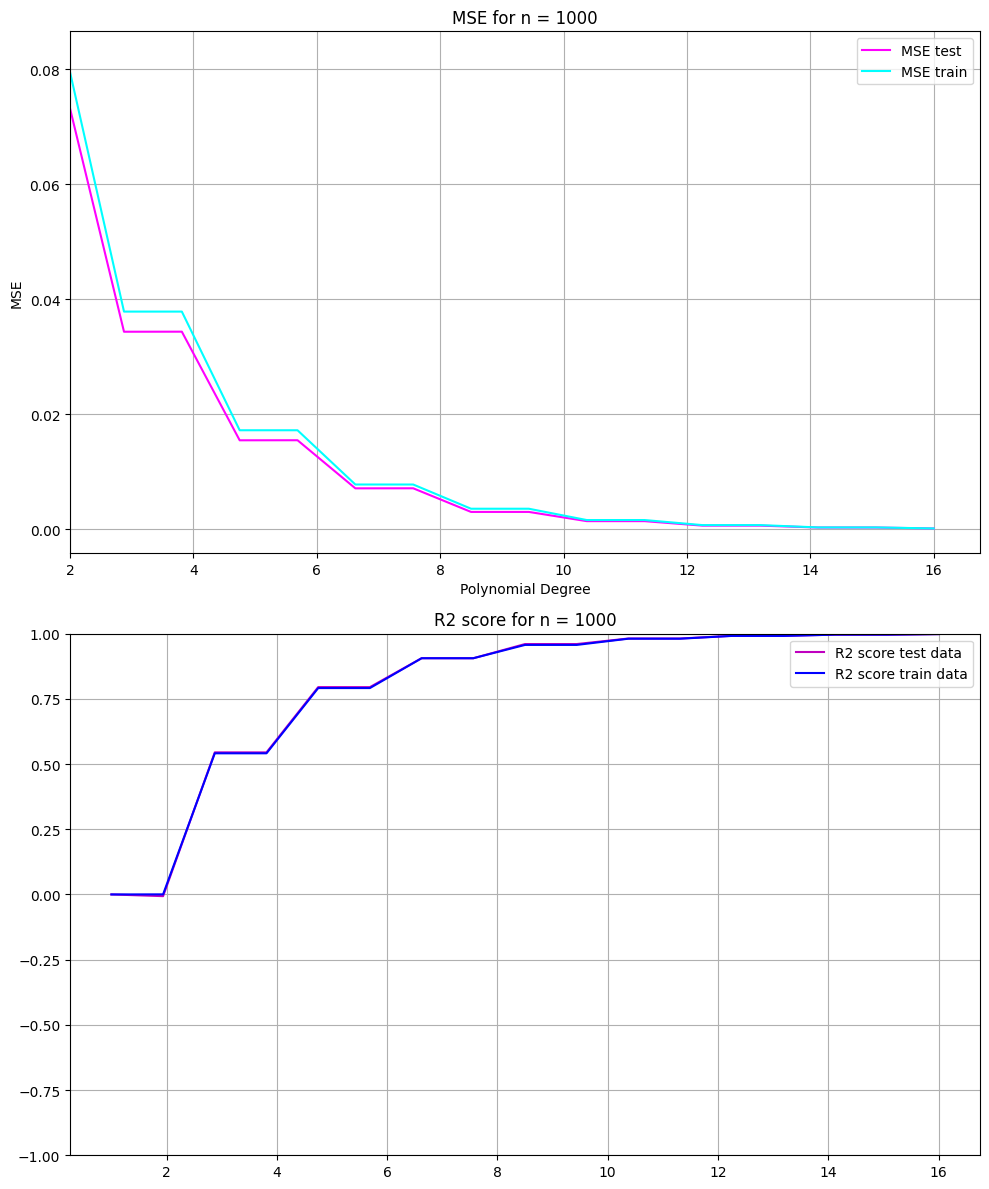

[ 0.00000000e+00 -8.41443166e-03 -1.68929297e+01  1.66006081e-01
  1.64103224e+02 -1.37915655e+00 -8.79930363e+02  5.99537029e+00
  2.71652725e+03 -1.49437310e+01 -4.94474441e+03  2.13444944e+01
  5.23153396e+03 -1.60646440e+01 -2.97126112e+03  4.89659440e+00
  6.99763034e+02]


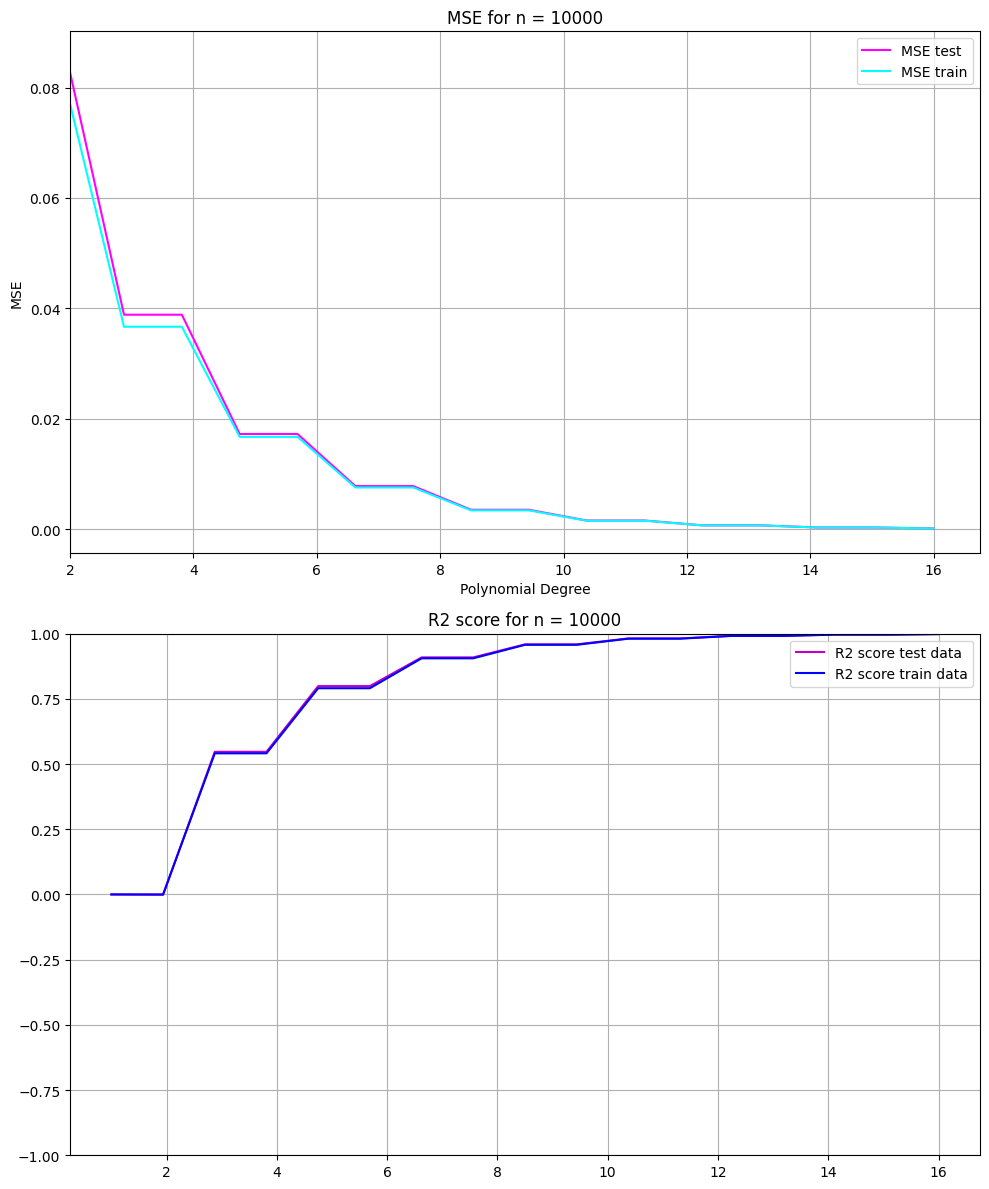

[ 0.00000000e+00 -1.73208743e-03 -1.68006363e+01  4.40298488e-02
  1.62812827e+02 -3.97612313e-01 -8.71791282e+02  1.73467100e+00
  2.68961821e+03 -4.03024788e+00 -4.89478789e+03  5.04453428e+00
  5.17910610e+03 -3.18682562e+00 -2.94222662e+03  7.92233000e-01
  6.93169433e+02]


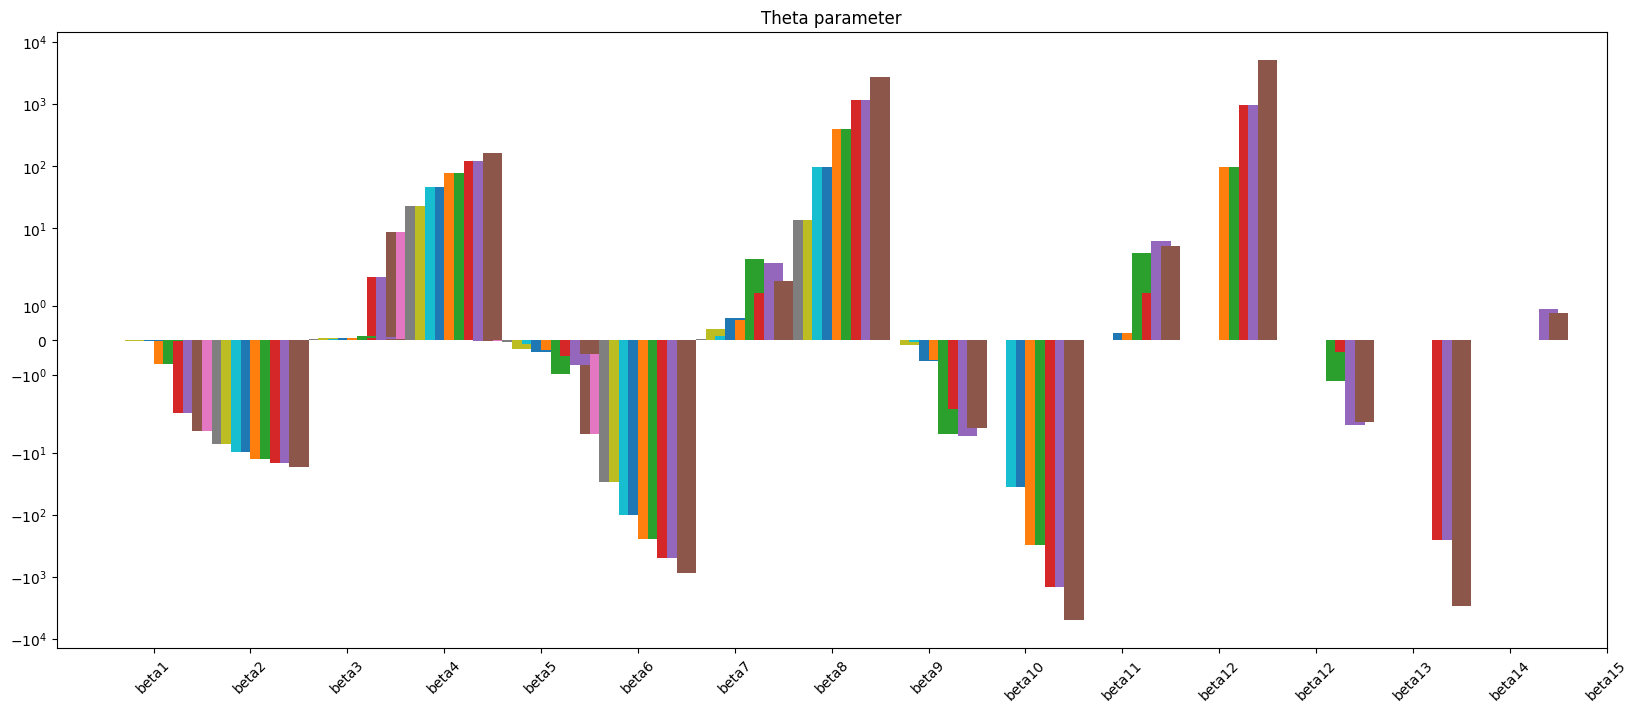

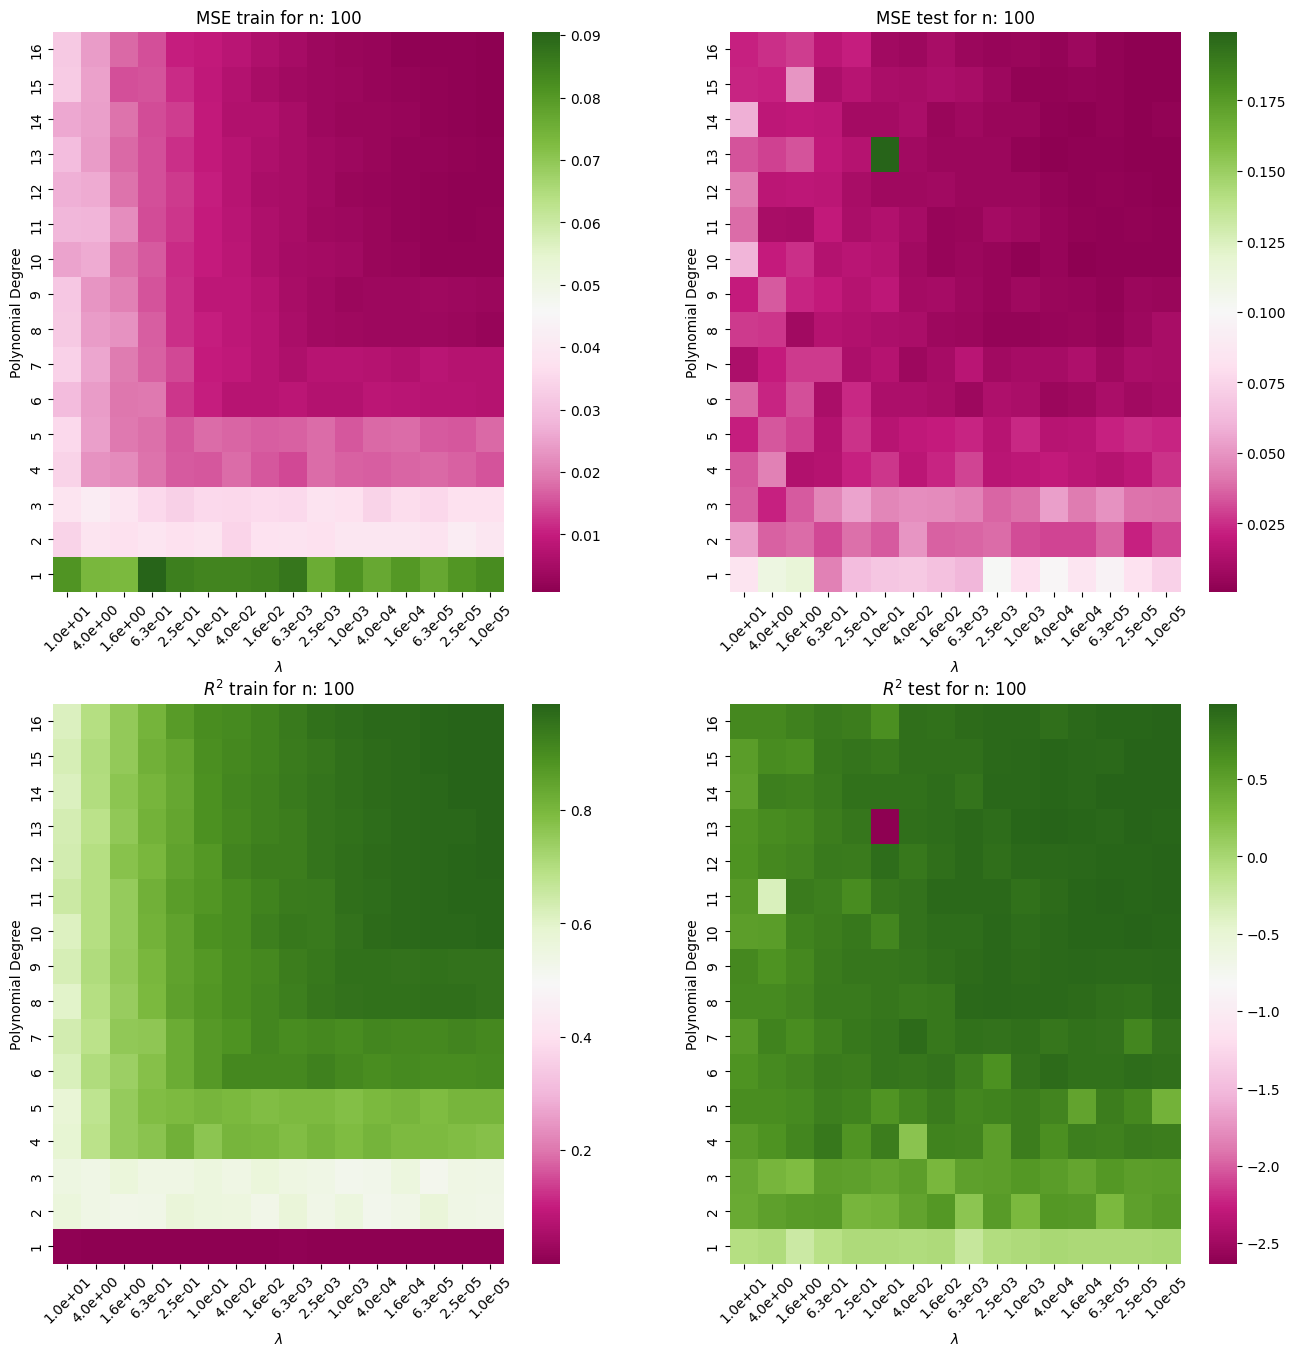

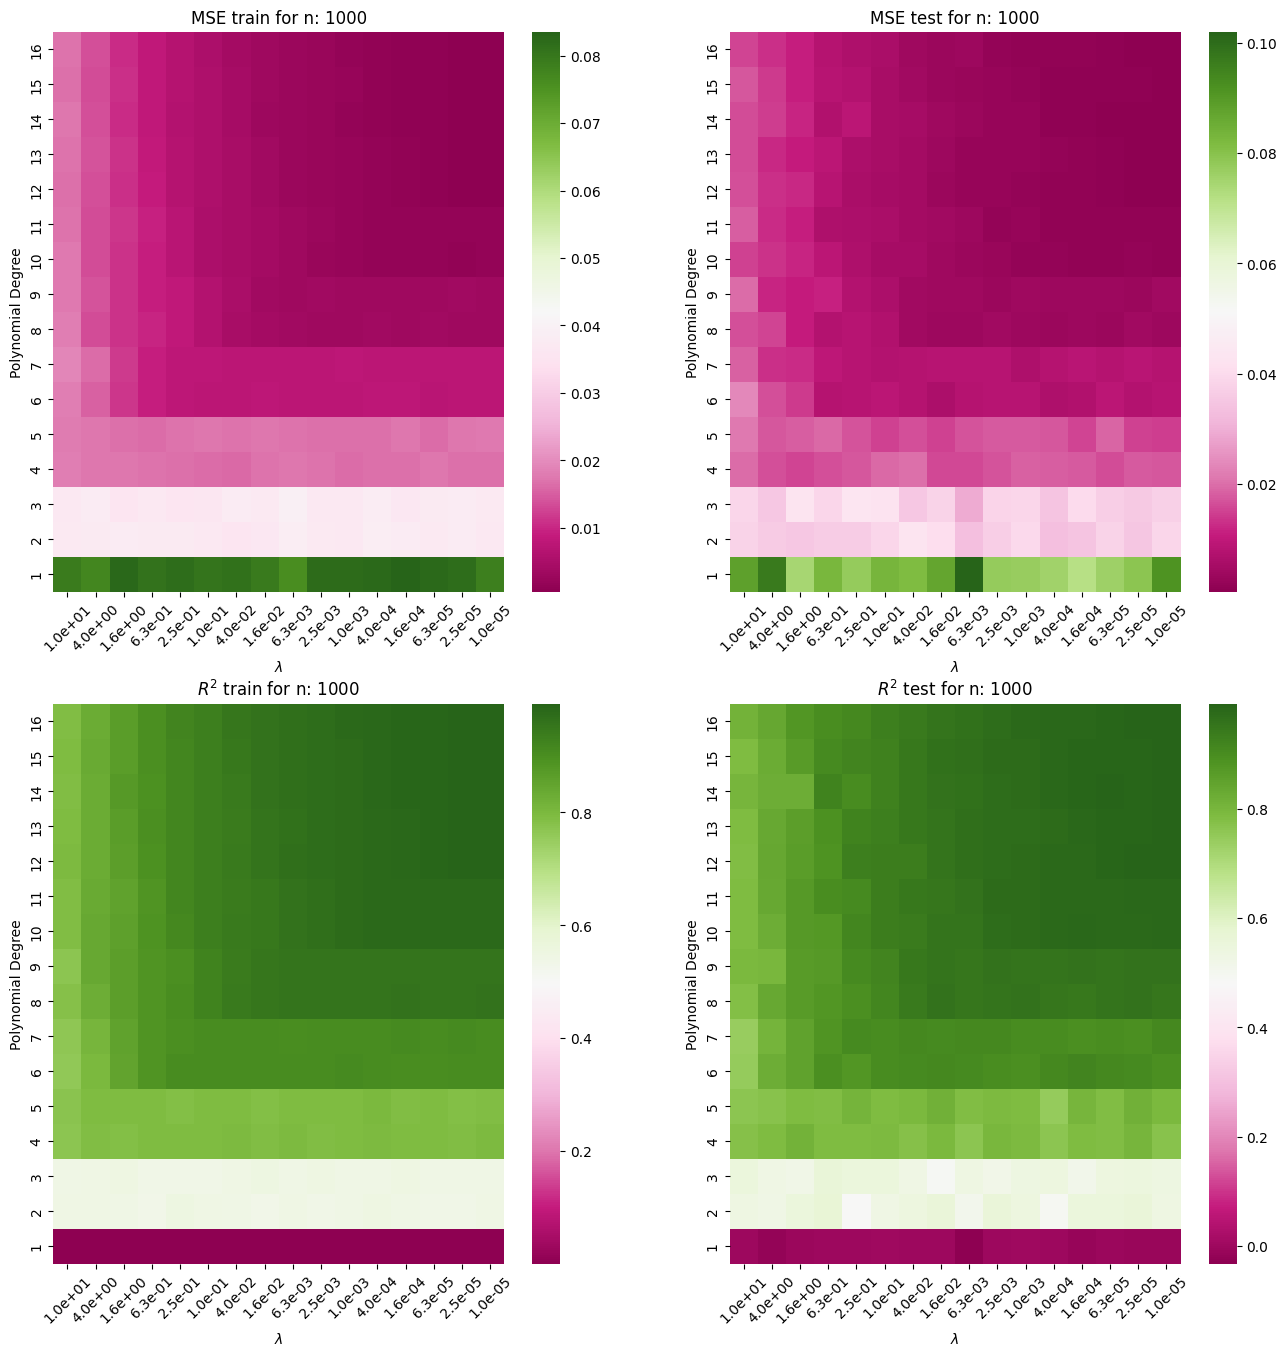

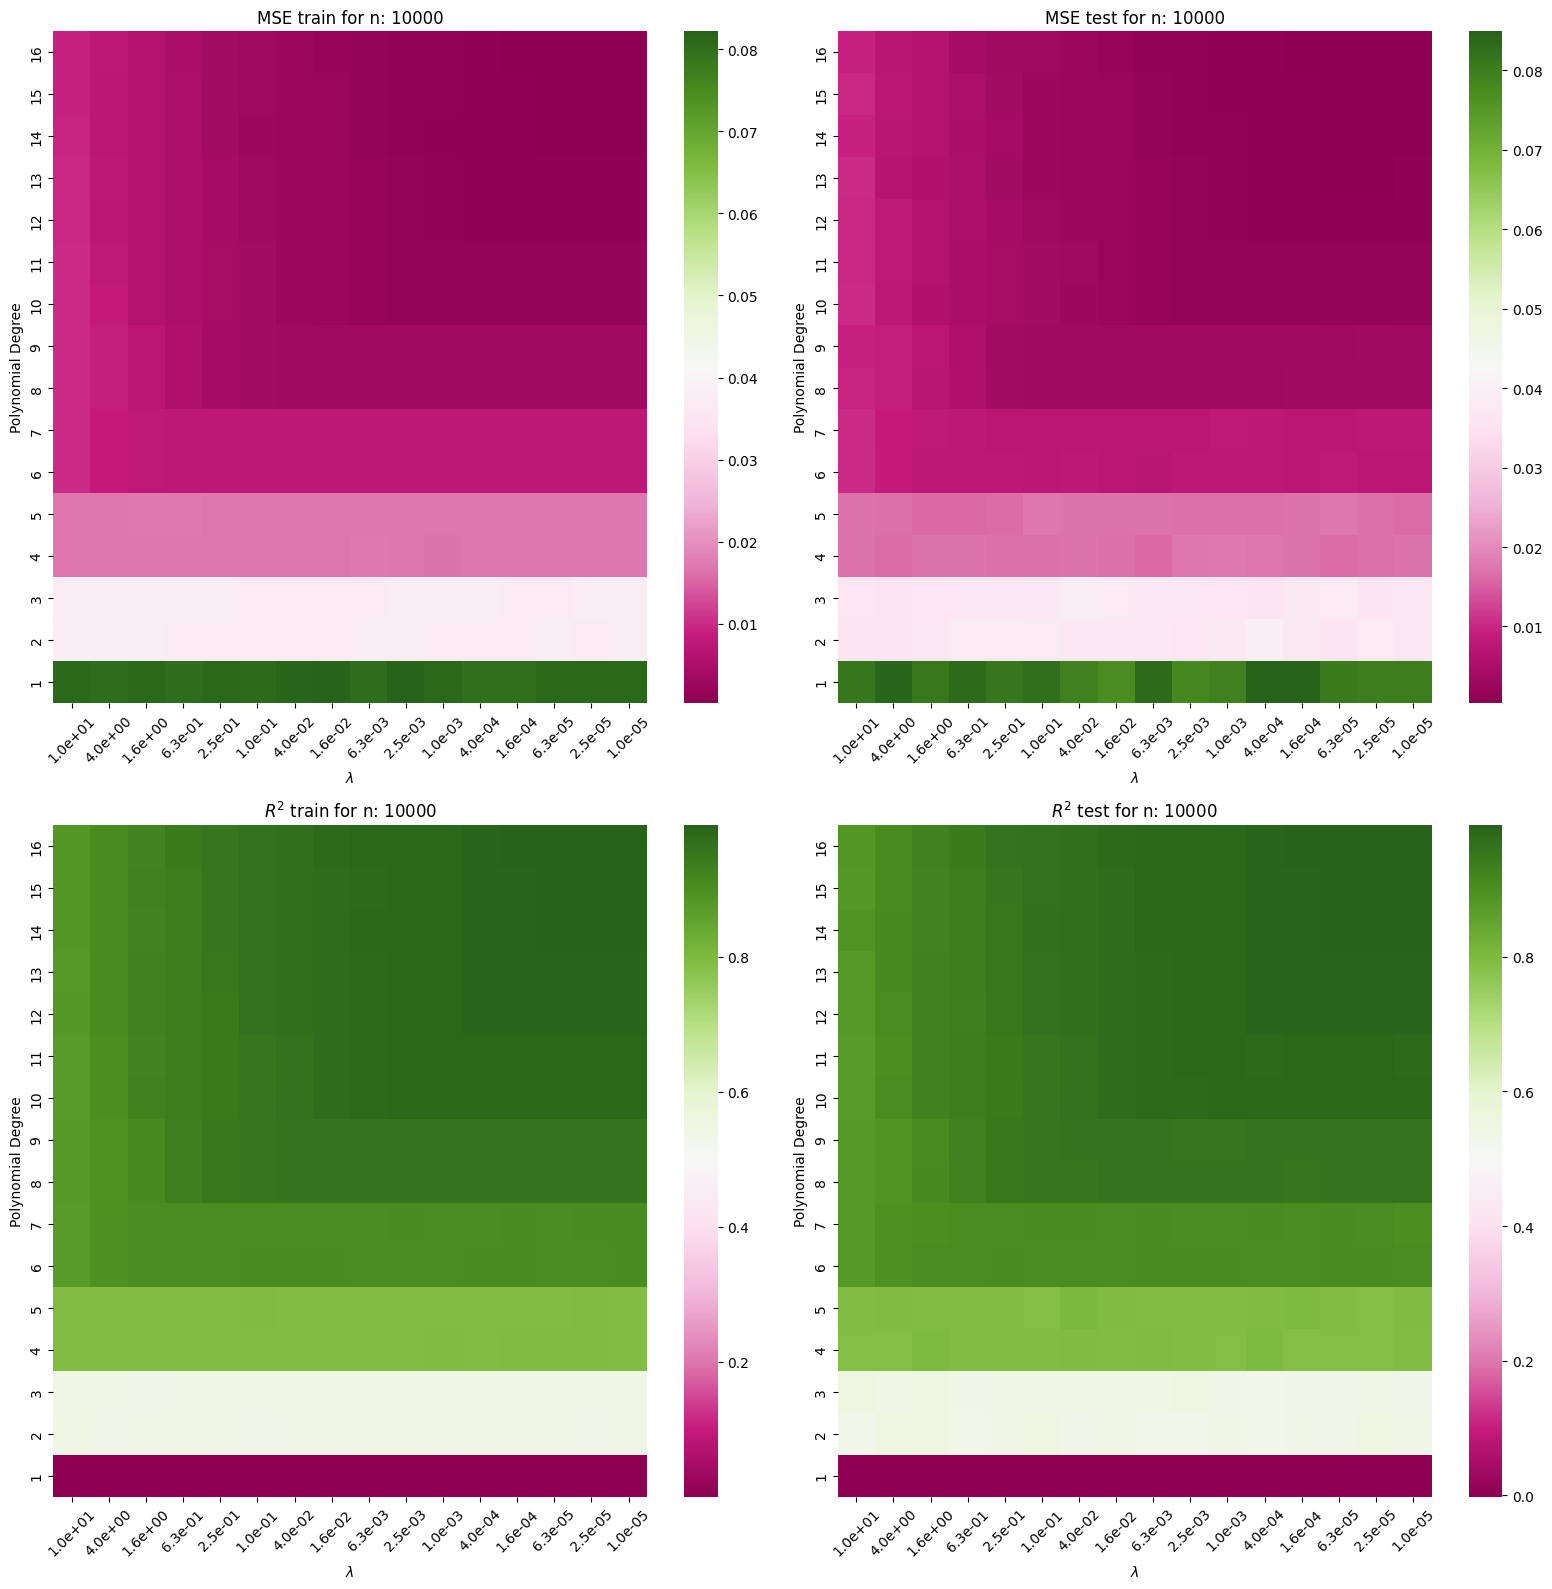

loop broken at 823 for degree: 1
(16,)
[0.46650526 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 703 for degree: 2
(16,)
[0.46650526 0.57051523 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 756 for degree: 3
(16,)
[0.46650526 0.57051523 0.33897965 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 731 for degree: 4
(16,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
loop broken at 705 for degree: 5
(16,)
[0.46650526 0.57051523 0.33897965 0.38700513 0.49755056 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

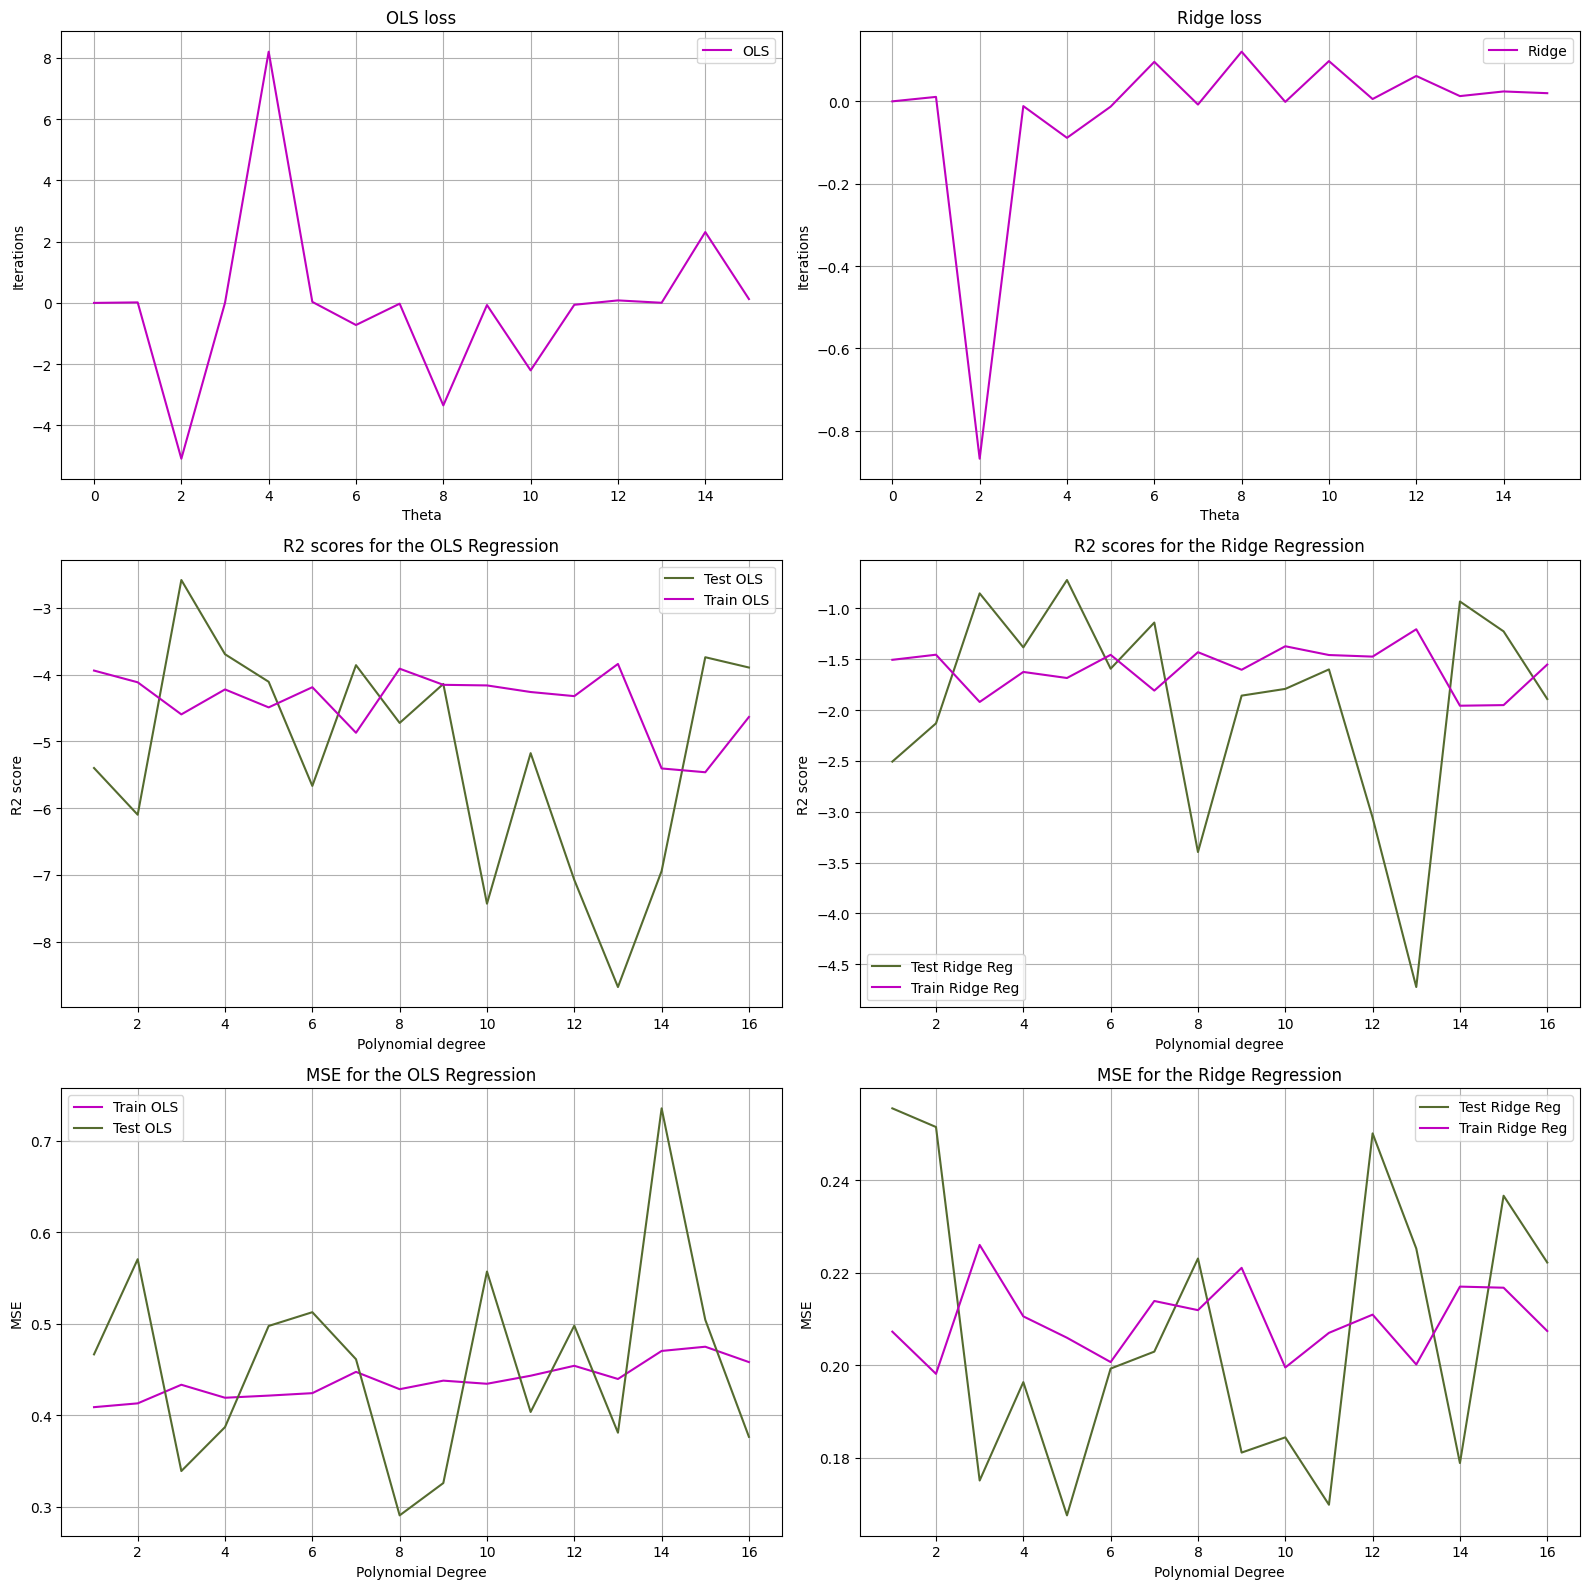

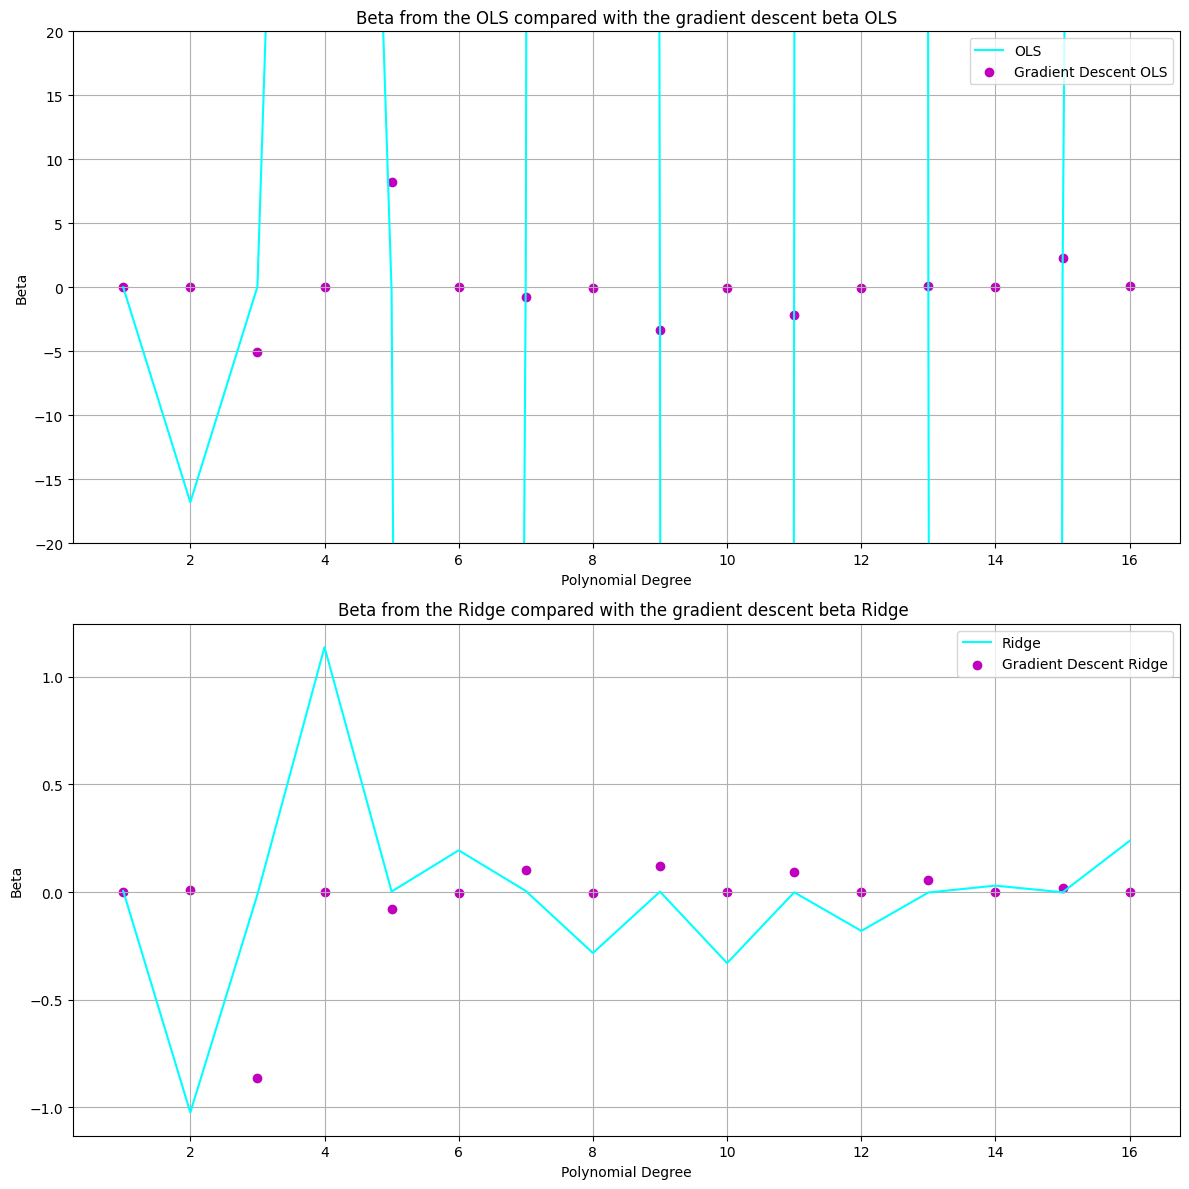

In [13]:
def compare_a_b_c(degree=16):
    #run functions:
    beta_ols = mse_poly_plot_OLS(degree, intercept = False)
    beta_ridge = poly_plot_ridge(intercept=False, annotate=False)

    theta_gdOLSn, theta_gdRidgen = gradient(x,y,n_feat=degree, degree=degree)

    x_line = np.arange(1, degree +1)
    fig, ax = plt.subplots(2,1, figsize = (12,12))
    ax[0].plot(x_line, beta_ols[1:degree+1], label = f'OLS', color = 'cyan')
    ax[0].scatter(x_line, theta_gdOLSn, color = 'm', label = 'Gradient Descent OLS')
    ax[0].grid(True)
    ax[0].set_title('Beta from the OLS compared with the gradient descent beta OLS')
    ax[0].set_xlabel('Polynomial Degree')
    ax[0].set_ylabel('Beta')
    ax[0].legend()

    ax[1].plot(x_line, beta_ridge[1:degree+1], label = f'Ridge', color = 'cyan')
    ax[1].scatter(x_line, theta_grad_ridge, color = 'm', label = 'Gradient Descent Ridge')
    ax[1].grid(True)
    ax[1].set_title('Beta from the Ridge compared with the gradient descent beta Ridge ')
    ax[1].set_xlabel('Polynomial Degree')
    ax[1].set_ylabel('Beta')
    ax[1].legend()
    ax[0].set_ylim(-20,20)
    plt.tight_layout()
    plt.show()

compare_a_b_c()

# Exercise D

Adding:
- momentum
- ADAGrad
- RMSProp
- ADAM

loop broken at 566 for degree: 1
(17,)
[0.4572905 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
loop broken at 484 for degree: 2
(17,)
[0.4572905  0.55026838 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 521 for degree: 3
(17,)
[0.4572905  0.55026838 0.34002104 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 503 for degree: 4
(17,)
[0.4572905  0.55026838 0.34002104 0.38792423 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 486 for degree: 5
(17,)
[0.4572905  0.55026838 0.34002104 0.38792423 0.49912239 0.
 0.         0.         0.         0.         0.         0.
 0

(array([ 0.        , -0.05069549, -5.29262799,  0.07022494,  9.14755205,
         0.08794064, -1.72519764, -0.01129928, -3.75221887, -0.0920251 ,
        -1.80540592, -0.1008447 ,  0.56590261, -0.02734794,  2.08363721,
         0.12423619]),
 array([ 0.00000000e+00,  8.11869581e-03, -8.65898451e-01,  2.31077273e-04,
        -7.96920898e-02, -2.31728854e-03,  1.00366035e-01, -2.61883350e-03,
         1.19252346e-01, -1.68926476e-03,  9.30359119e-02, -4.50715274e-04,
         5.63512584e-02,  6.32210991e-04,  2.01716650e-02,  1.41190605e-03]))

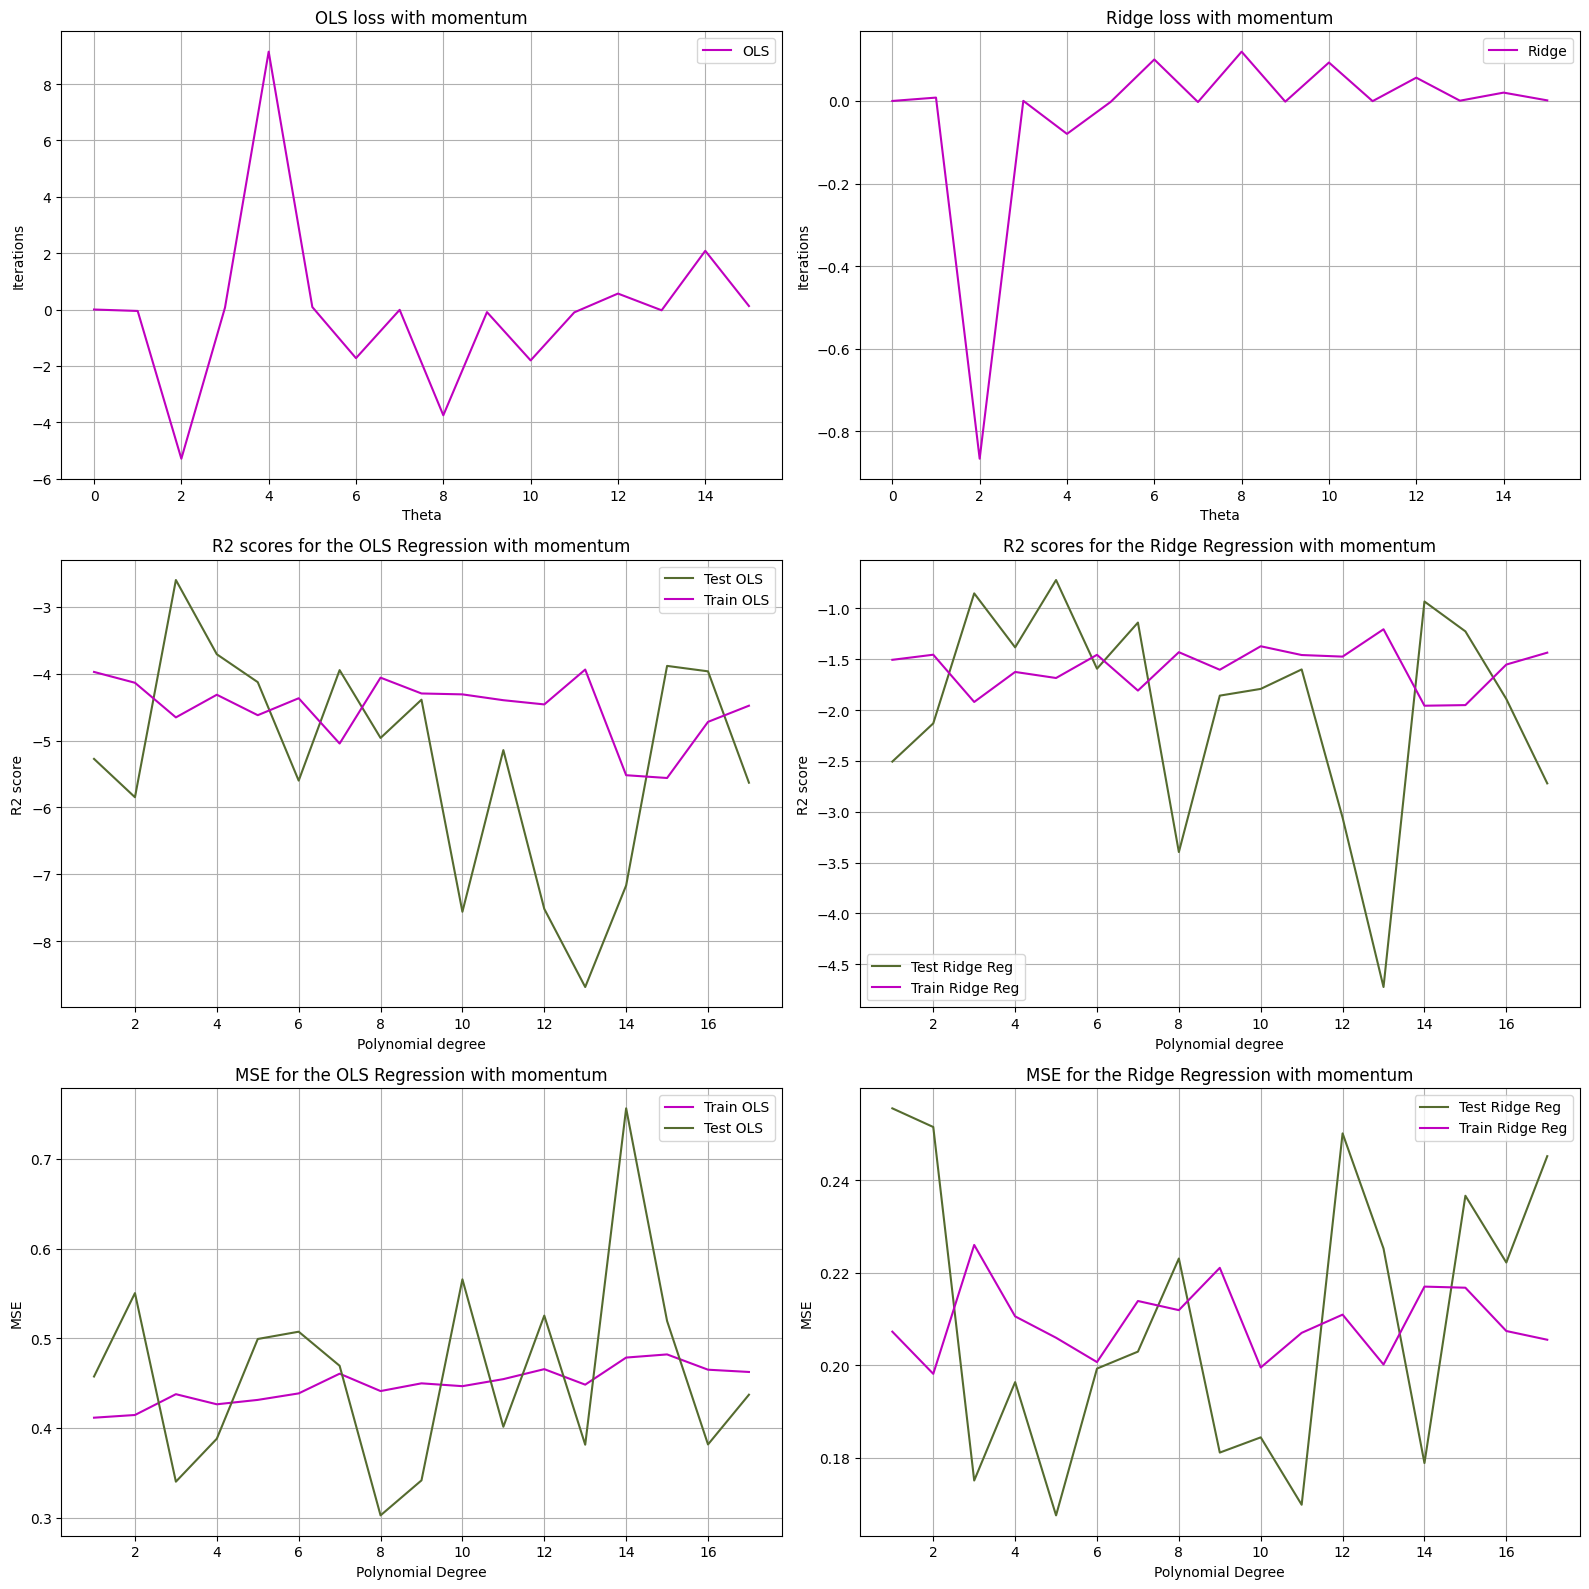

In [ ]:
#prøver på nytt for momentum 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_momentum(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.1
    lam = 0.1 #fixed lambda for the Ridge
    mom = 0.3 
    v_ols = np.zeros(n_feat)
    v_ridge = np.zeros(n_feat)
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            #calculating the change using momentum
            v_ols = mom * v_ols + eta *grad_OLSn
            #update beta
            theta_gdOLSn = theta_gdOLSn - v_ols

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta with momentum
            v_ridge = mom * v_ridge + eta * grad_Ridgen
            #updating beta
            theta_gdRidgen = theta_gdRidgen - v_ridge
            
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with momentum")
    ax[0,1].set_title("Ridge loss with momentum")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with momentum')
    ax[1,0].set_title('R2 scores for the OLS Regression with momentum')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with momentum')
    ax[2,1].set_title('MSE for the Ridge Regression with momentum')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen

gradient_momentum(x, y, 16)

(17,)
[0.24998699 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.24998699 0.27713072 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.24998699 0.27713072 0.21124678 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.24998699 0.27713072 0.21124678 0.25140506 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.24998699 0.27713072 0.21124678 0.25140506 0.23370406 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.24998699 0.27713072 0.21124678 0.25140506 0.23370406 0.26381573
 0.         0.        

(array([ 0.        ,  0.01556934, -1.51239419, -0.05131741, -0.24062702,
        -0.07988196,  0.81817449,  0.0201896 ,  0.96019383,  0.10102512,
         0.39783951,  0.08698873, -0.35585669,  0.00417266, -0.74662067,
        -0.10669773]),
 array([ 0.00000000e+00,  8.18143020e-03, -8.59581171e-01,  2.47923439e-04,
        -8.81784780e-02, -2.32104692e-03,  9.93629490e-02, -2.63158945e-03,
         1.20514557e-01, -1.70266287e-03,  9.43950008e-02, -4.60506979e-04,
         5.72665889e-02,  6.27102715e-04,  2.03893967e-02,  1.41089946e-03]))

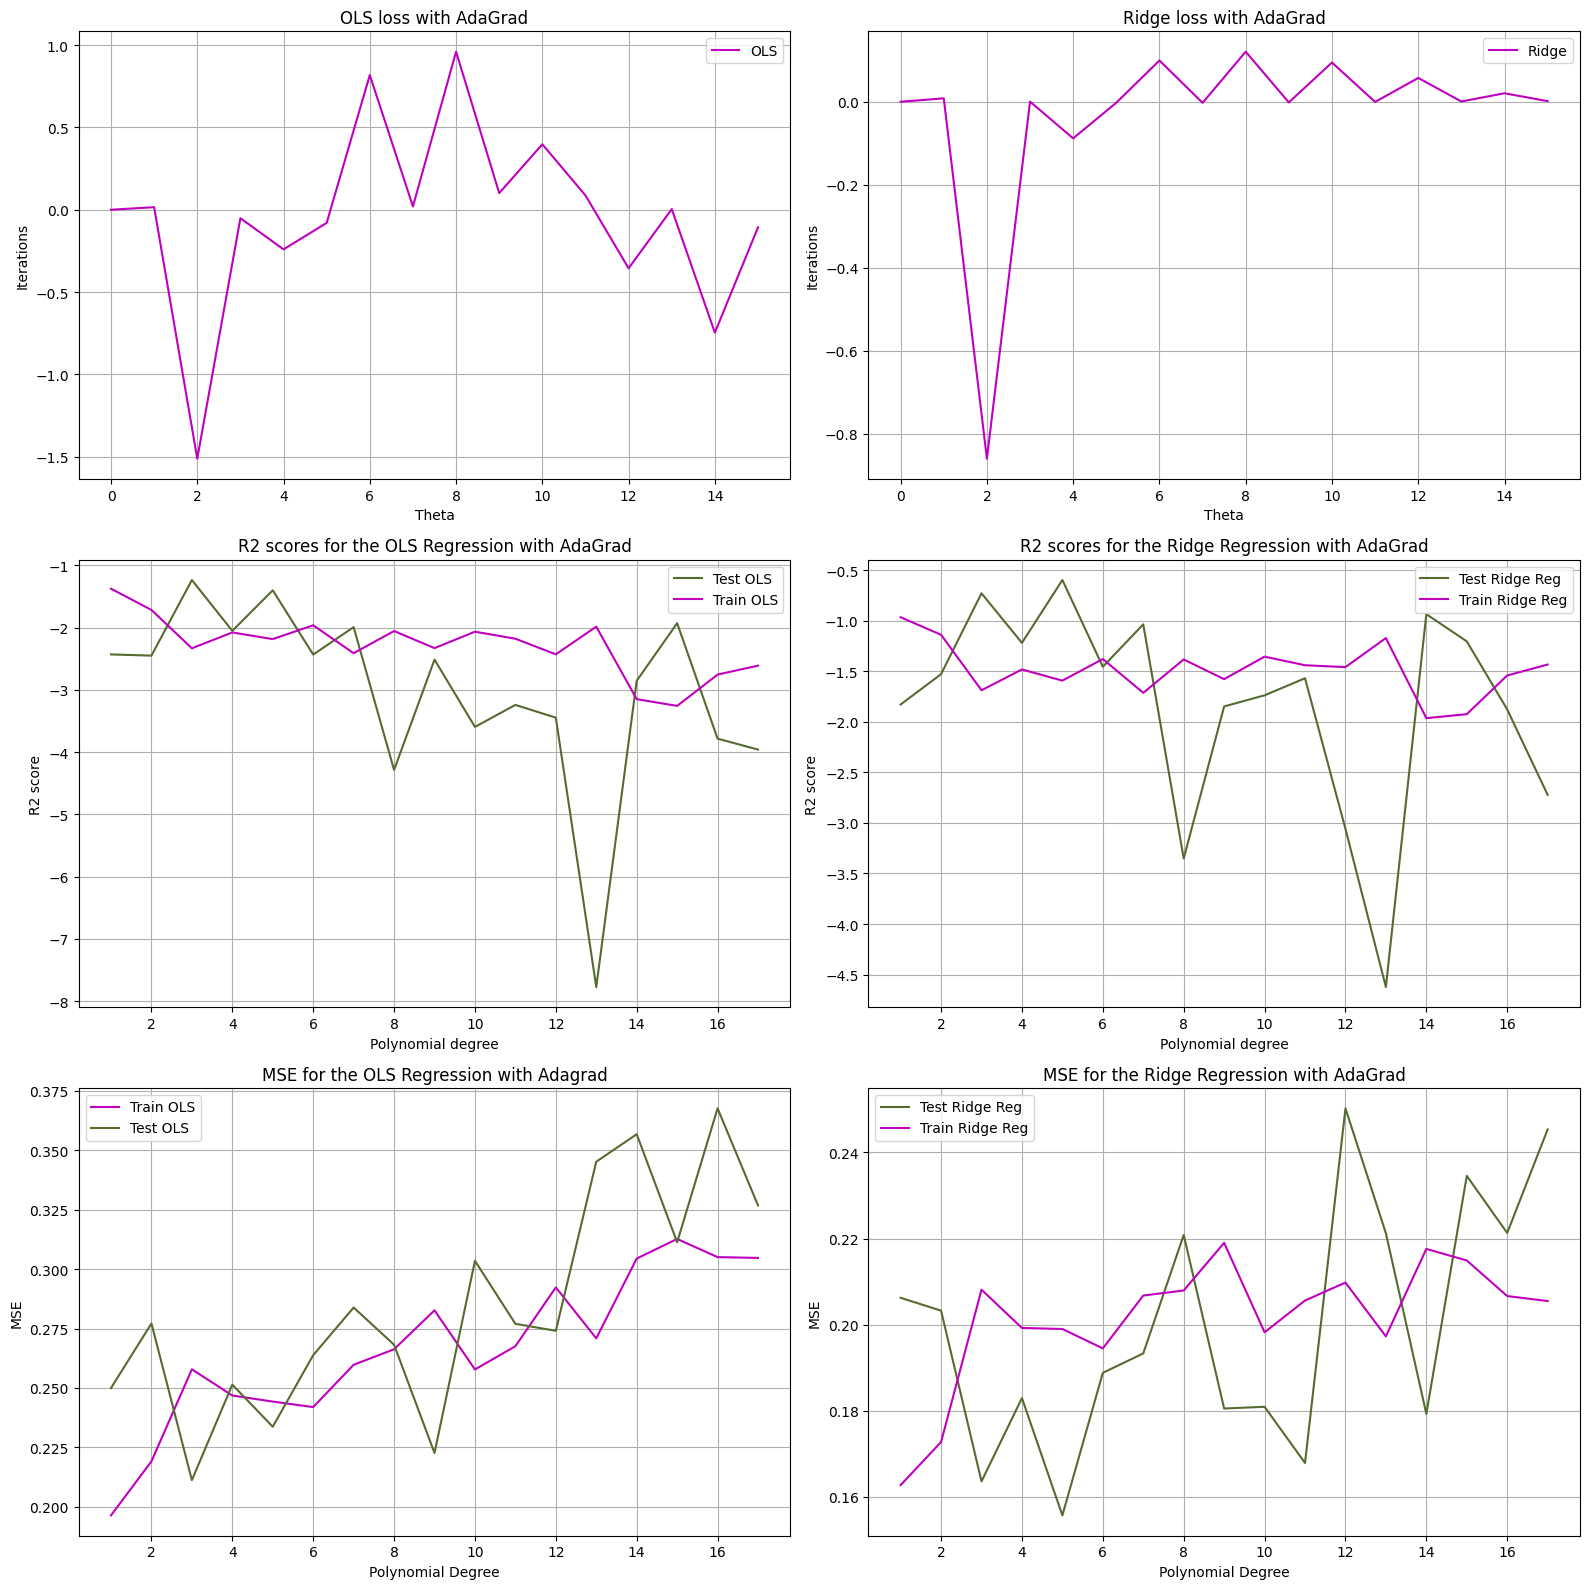

In [26]:
#Adagrad 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_momentum(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    Giter_ols = 0.0
    Giter_ridge = 0.0

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            Giter_ols += grad_OLSn * grad_OLSn
            update_ols = grad_OLSn * eta / (epsilon + np.sqrt(Giter_ols))
            theta_gdOLSn -= update_ols
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            Giter_ridge += grad_Ridgen * grad_Ridgen
            update_ridge = grad_Ridgen * eta / (epsilon + np.sqrt(Giter_ridge))
            theta_gdRidgen -= update_ridge
            
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with AdaGrad")
    ax[0,1].set_title("Ridge loss with AdaGrad")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with AdaGrad')
    ax[1,0].set_title('R2 scores for the OLS Regression with AdaGrad')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with Adagrad')
    ax[2,1].set_title('MSE for the Ridge Regression with AdaGrad')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen

gradient_momentum(x, y, 16)

(17,)
[0.45107899 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.45107899 0.53846926 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.45107899 0.53846926 0.34366787 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.45107899 0.53846926 0.34366787 0.39313387 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.45107899 0.53846926 0.34366787 0.39313387 0.48896806 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
(17,)
[0.45107899 0.53846926 0.34366787 0.39313387 0.48896806 0.48078722
 0.         0.        

(array([ 0.        , -0.04835022, -5.36541482,  0.09015499,  9.45663746,
         0.07648023, -2.13275398, -0.01742544, -3.78607095, -0.08032235,
        -1.61282981, -0.07930478,  0.70439189, -0.01294061,  1.92166278,
         0.11186857]),
 array([ 0.        ,  0.0031187 , -0.86089845, -0.00476892, -0.07469209,
        -0.00731729,  0.10536604, -0.00761883,  0.12425234, -0.00668926,
         0.09803591, -0.00545071,  0.06135126, -0.00436779,  0.02517167,
        -0.00358809]))

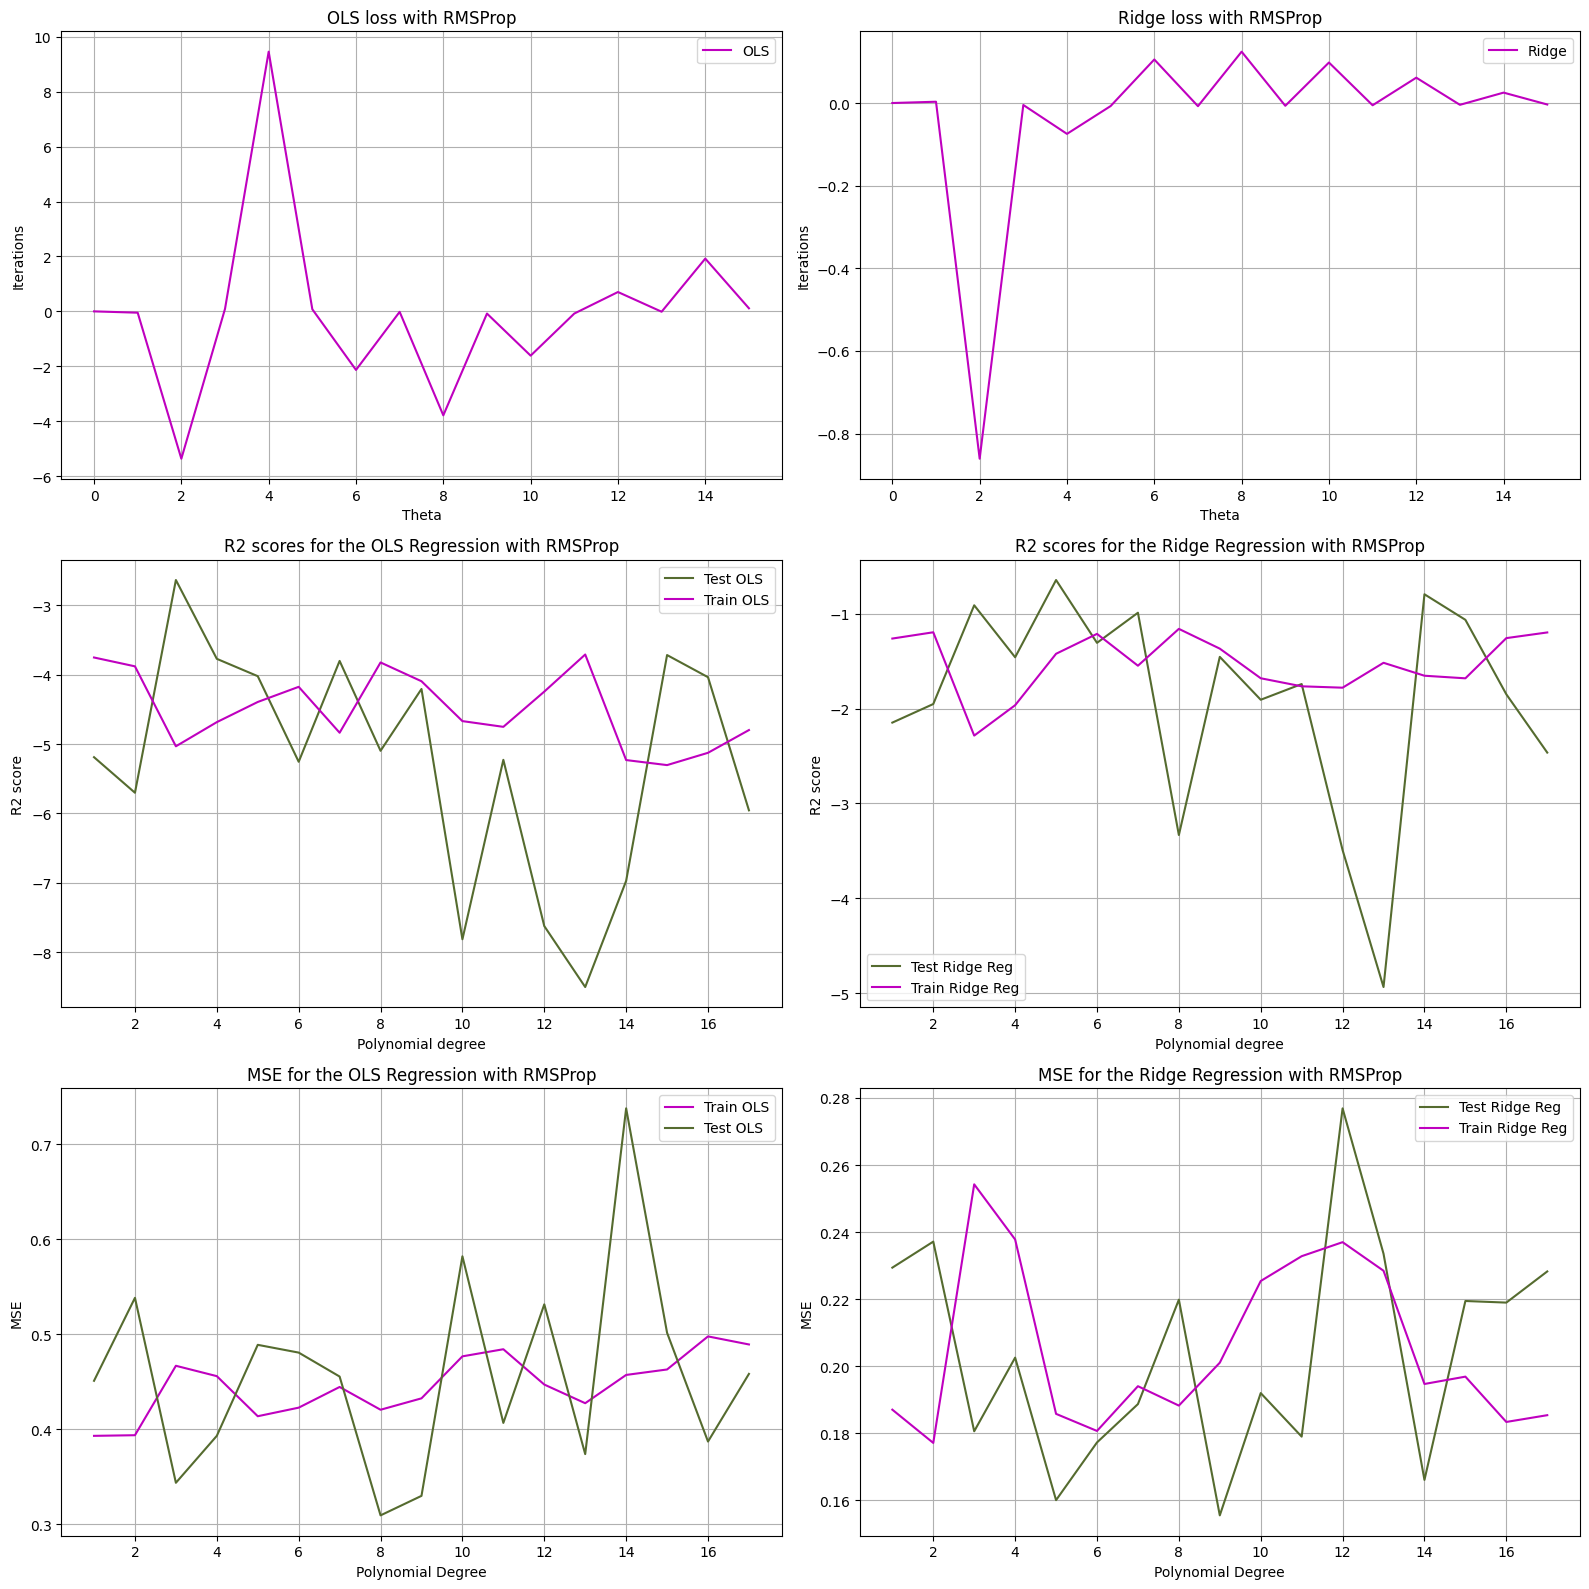

In [30]:
#RMSprop
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_momentum(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    Epsilon = 0.9
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    Giter_ols = 0.0
    Giter_ridge = 0.0


    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            Giter_ols = (Epsilon * Giter_ols + (1-Epsilon) * grad_OLSn * grad_OLSn)
            update_ols = grad_OLSn * eta / (epsilon + np.sqrt(Giter_ols))
            theta_gdOLSn -= update_ols
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            Giter_ridge = (Epsilon * Giter_ridge + (1-Epsilon) * grad_Ridgen * grad_Ridgen)
            update_ridge = grad_Ridgen * eta / (epsilon + np.sqrt(Giter_ridge))
            theta_gdRidgen -= update_ridge
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with RMSProp")
    ax[0,1].set_title("Ridge loss with RMSProp")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with RMSProp')
    ax[1,0].set_title('R2 scores for the OLS Regression with RMSProp')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with RMSProp')
    ax[2,1].set_title('MSE for the Ridge Regression with RMSProp')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen

gradient_momentum(x, y, 16)

loop broken at 684 for degree: 1
(17,)
[0.45680342 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 451 for degree: 2
(17,)
[0.45680342 0.53233873 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 367 for degree: 3
(17,)
[0.45680342 0.53233873 0.34060028 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 285 for degree: 4
(17,)
[0.45680342 0.53233873 0.34060028 0.39948858 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
loop broken at 305 for degree: 5
(17,)
[0.45680342 0.53233873 0.34060028 0.39948858 0.51917951 0.
 0.         0.         0.         0.         0

(array([ 0.00000000e+00, -7.02392435e-02, -7.32782114e+00,  2.37632376e-01,
         2.01774626e+01, -1.89029577e-01, -1.75439467e+01, -3.49474425e-02,
        -5.96671840e+00,  2.04832198e-02,  8.68982690e+00,  1.52033197e-02,
         8.37418739e+00,  1.31862509e-02, -7.22590547e+00,  6.85280322e-03]),
 array([ 0.00000000e+00,  8.11869959e-03, -8.65898452e-01,  2.31077107e-04,
        -7.96920870e-02, -2.31729097e-03,  1.00366036e-01, -2.61883504e-03,
         1.19252344e-01, -1.68926403e-03,  9.30359096e-02, -4.50712676e-04,
         5.63512583e-02,  6.32213611e-04,  2.01716675e-02,  1.41190649e-03]))

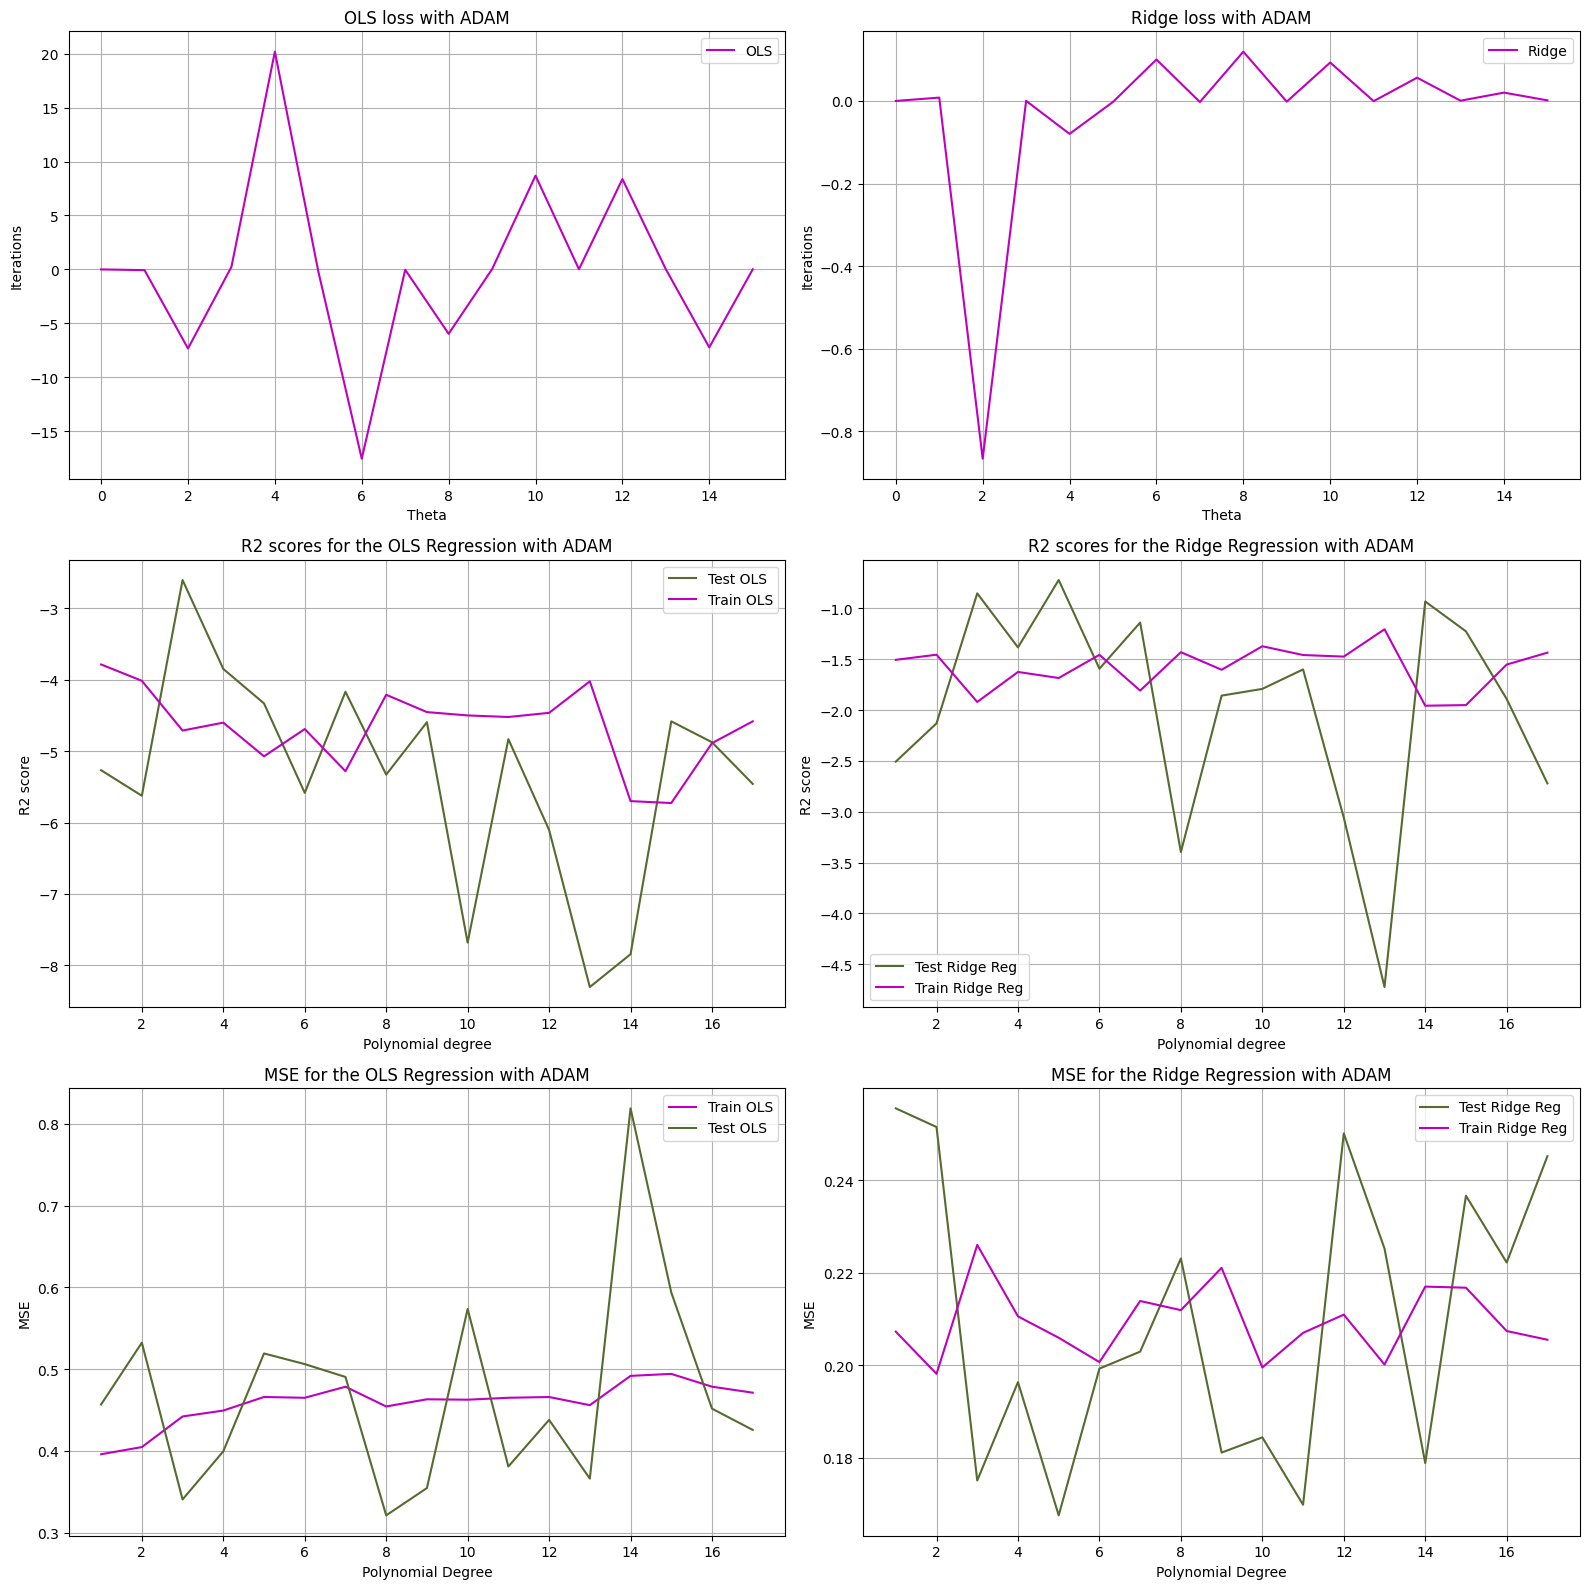

In [37]:
#ADAM 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_momentum(x,y,n_feat, degree=17):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    theta1 = 0.9
    theta2 = 0.999
    first_moment_ols = 0.0
    second_moment_ols = 0.0
    first_moment_ridge = 0.0 
    second_moment_ridge = 0.0
    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            t += 1
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            #first moment
            first_moment_ols = theta1 * first_moment_ols + (1 - theta1) * grad_OLSn
            second_moment_ols = theta2 * second_moment_ols + (1 - theta2) * grad_OLSn * grad_OLSn
            first_term_ols = first_moment_ols / (1-theta1 **t)
            second_term_ols = second_moment_ols / (1-theta2 **t)
            theta_gdOLSn -= eta * first_term_ols / (np.sqrt(second_term_ols) + epsilon)
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(1,num_iters+1):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            first_moment_ridge = theta1 * first_moment_ridge + (1 - theta1) * grad_Ridgen
            second_moment_ridge = theta2 * second_moment_ridge + (1 - theta2) * grad_Ridgen * grad_Ridgen
            first_term_ridge = first_moment_ridge / (1-theta1 **t)
            second_term_ridge = second_moment_ridge / (1-theta2 **t)
            theta_gdRidgen -= eta * first_term_ridge / (np.sqrt(second_term_ridge) + epsilon)

    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
        print(degree_plot.shape)
        print(mse_gdOLSn_test)

    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with ADAM")
    ax[0,1].set_title("Ridge loss with ADAM")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with ADAM')
    ax[1,0].set_title('R2 scores for the OLS Regression with ADAM')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with ADAM')
    ax[2,1].set_title('MSE for the Ridge Regression with ADAM')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen

gradient_momentum(x, y, 16)

# Exercise 1E